# Telecom Churn Prediction Case Study

## Team Members
 
     1. Amrit Pattanayak (Group Facilitator)
     2. Kinchit Jain 

# Business Understanding :-
 
 In the telecom industry, Customers have the liberty to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. 
 
 Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one. So the customer retention has now become even more important than customer acquisition. There are many incumbent operators for whom retaining the high profitable customers is the number one business goal.
 
 In order to reduce customer churning, the telecom companies need to predict which customers are at high risk of churn.
 
 
 Understanding and Defining Churn:----
 
 There are two main models of payment in the telecom industry - 
 
   Postpaid -- customers pay a monthly/annual bill after using the services 
   Prepaid  -- customers pay/recharge with a certain amount in advance and then use the services
 
  
 Churn prediction is usually more critical (and non-trivial) for prepaid customers than the postpaid customers.
 Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.
 
  
 There are various ways to define churn, such as:
 
   Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing                             calls, SMS etc. over a given period of time. This is very common in rural areas as the users in rural                           areas only receive calls from their wage-earning siblings in urban areas.
 
   Usage-based churn  : Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc                           over a period of time.
 
 In this project, you will use the usage-based definition to define churn.

 # Business Objective :-
 
 The objective of this project is to analyse customer-level data of a leading telecom firm, build predictive models to identify 
 
   1. Customers at high risk of churn 
   2. Identify the main indicators of churn

### Importing Necessary Modules and Libraries

In [2]:
## Lets import all the necessary libraries to read data file, Plot the charts,
## Performing mathematical operations, Model creation and Selection

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', None) 
pd.options.display.float_format = '{:20,.2f}'.format 

from scipy import special 
import matplotlib.animation as animation
from IPython.display import Markdown, display ,HTML



In [3]:
## Importing the Dataset :-- 
# Imporing the Telecom Churn dataset into a Dataframe and using proper encoding mechanism

TelecomChurn_df = pd.read_csv("telecom_churn_data.csv",encoding = "ISO-8859-1",low_memory=False)


In [4]:
# Checking the dataset

TelecomChurn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [5]:
# Checking the basic details of the Dataframe

print("The Shape of the TelecomChurn_df is :-")
print(TelecomChurn_df.shape)
print("  ")

print("*****************************************************************")

print("  ")

print("The info of the TelecomChurn_df is :-")
print(TelecomChurn_df.info())

The Shape of the TelecomChurn_df is :-
(99999, 226)
  
*****************************************************************
  
The info of the TelecomChurn_df is :-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


#### Observation:- 

   1. In total, There are 99999 rows in the TelecomChurn_df dataframe.
   2. There are 226 columns in the TelecomChurn_df dataframe out of which 12 are Non-Numeric columns and 214 are numeric


In [7]:

# Checking the statistics of the numerics columns in the Dataframe

print(" ")

print("The Statistics of the numeric columns in the TelecomChurn_df is :--")

print(" ")

print("***********************************************************************************")

TelecomChurn_df.describe()

 
The Statistics of the numeric columns in the TelecomChurn_df is :--
 
***********************************************************************************


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","98,981.00","98,981.00","98,981.00","99,999.00","99,999.00","99,999.00","99,999.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00",

## Data Preparation :-- 


In [8]:
# Lets first try to work on the derivation of new features from the existing dataset. 
# Lets extract the list of recharge amount columns that will help us in determining the high value customer records.

In [8]:
# Deriving New features
# Extracting the list of Recharge amount columns.
RechargeColumns = TelecomChurn_df.columns[TelecomChurn_df.columns.str.contains('rech_amt|rech_data')]
print(RechargeColumns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


#### Observation:--

    1. In total there are 25 columns that are related to recharge amounts
    2. From the above columns we can derive information like 
        a. Total Recharge amount, Maximum Recharge amount
        b. Last date of recharging the Data, Maximum recharging Data
        c. Average Recharge amount for Data and Maximum Recharge for Data
    


In [9]:
## Lets check for Missing values in the above columns

TelecomChurn_df_NullCheck = pd.DataFrame(round(100*(TelecomChurn_df.loc[:,RechargeColumns].isnull().sum()/len(TelecomChurn_df)),2))
TelecomChurn_df_NullCheck.rename(columns={0:'Null_Percentage'}, inplace=True)
display(TelecomChurn_df_NullCheck)

,Null_Percentage
total_rech_amt_6,0.00
total_rech_amt_7,0.00
total_rech_amt_8,0.00
total_rech_amt_9,0.00
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
date_of_last_rech_data_6,74.85
date_of_last_rech_data_7,74.43


#### Observation :---
    
   1. Columns like total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,
      max_rech_amt_7,max_rech_amt_8,max_rech_amt_9 do not have any null values in them.
   2. Columns like date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,
      date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,
      max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,
      av_rech_amt_data_8,av_rech_amt_data_9 have more than 74% null values in them.
      


In [10]:
## Lets check the statistics of the recharge columns 

TelecomChurn_df.loc[:,RechargeColumns].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,"99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","25,153.00","25,571.00","26,339.00","25,922.00","25,153.00","25,571.00","26,339.00","25,922.00","25,153.00","25,571.00","26,339.00","25,922.00"
mean,327.51,322.96,324.16,303.35,104.64,104.75,107.73,101.94,2.46,2.67,2.65,2.44,126.39,126.73,125.72,124.94,192.60,200.98,197.53,192.73
std,398.02,408.11,416.54,404.59,120.61,124.52,126.90,125.38,2.79,3.03,3.07,2.52,108.48,109.77,109.44,111.36,192.65,196.79,191.30,188.40
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.50,0.50,1.00
25%,109.00,100.00,90.00,52.00,30.00,30.00,30.00,28.00,1.00,1.00,1.00,1.00,25.00,25.00,25.00,25.00,82.00,92.00,87.00,69.00
50%,230.00,220.00,225.00,200.00,110.00,110.00,98.00,61.00,1.00,1.00,1.00,2.00,145.00,145.00,145.00,145.00,154.00,154.00,154.00,164.00
75%,437.50,428.00,434.50,415.00,120.00,128.00,144.00,144.00,3.00,3.00,3.00,3.00,177.00,177.00,179.00,179.00,252.00,252.00,252.00,252.00
max,"35,190.00","40,335.00","45,320.00","37,235.00","4,010.00","4,010.00","4,449.00","3,399.00",61.00,54.00,60.00,84.00,"1,555.00","1,555.00","1,555.00","1,555.00","7,546.00","4,365.00","4,076.00","4,061.00"


In [11]:
# Lets replace the null values with 0 for the recharge columns 

TelecomChurn_df['total_rech_data_6'] = TelecomChurn_df['total_rech_data_6'].replace(np.NaN,0.0)
TelecomChurn_df['total_rech_data_7'] = TelecomChurn_df['total_rech_data_7'].replace(np.NaN,0.0)
TelecomChurn_df['total_rech_data_8'] = TelecomChurn_df['total_rech_data_8'].replace(np.NaN,0.0)
TelecomChurn_df['total_rech_data_9'] = TelecomChurn_df['total_rech_data_9'].replace(np.NaN,0.0)

TelecomChurn_df['av_rech_amt_data_6'] = TelecomChurn_df['av_rech_amt_data_6'].replace(np.NaN,0.0)
TelecomChurn_df['av_rech_amt_data_7'] = TelecomChurn_df['av_rech_amt_data_7'].replace(np.NaN,0.0)
TelecomChurn_df['av_rech_amt_data_8'] = TelecomChurn_df['av_rech_amt_data_8'].replace(np.NaN,0.0)
TelecomChurn_df['av_rech_amt_data_9'] = TelecomChurn_df['av_rech_amt_data_9'].replace(np.NaN,0.0)

In [12]:
## Lets check for Missing values in the above columns again 

TelecomChurn_df_NullCheck = pd.DataFrame(round(100*(TelecomChurn_df.loc[:,RechargeColumns].
                                                    isnull().sum()/len(TelecomChurn_df)),2))

TelecomChurn_df_NullCheck.rename(columns={0:'Null_Percentage'}, inplace=True)

display(TelecomChurn_df_NullCheck)


,Null_Percentage
total_rech_amt_6,0.00
total_rech_amt_7,0.00
total_rech_amt_8,0.00
total_rech_amt_9,0.00
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
date_of_last_rech_data_6,74.85
date_of_last_rech_data_7,74.43


#### Observation:---
 
   1. Now we dont have any missing values in the recharge amount columns.
   2. Next step is to filter the high value customers.
   

In [13]:
# Checking the shape of the dataframe before filtering for the high value customers

print("The Shape of the TelecomChurn_df before filtering for the high value customers is :-")
print(TelecomChurn_df.shape)
print("  ")

print("*****************************************************************")

print("  ")

The Shape of the TelecomChurn_df before filtering for the high value customers is :-
(99999, 226)
  
*****************************************************************
  


In [15]:
## Lets try to get the high value customers. For that we first need to the total recharge amount 
## for the customers in the Good Phase. The ‘good’ phase is the one in which the customer is happy 
## with the service and behaves as usual. In the dataset it is marked by the column names ending with _6 and _7.

In [14]:
# Calculating the average recharge amount for 6 and 7 month
TelecomChurn_df['avg_rech_amt_6_7'] = ( TelecomChurn_df['total_rech_amt_6'] + TelecomChurn_df['total_rech_amt_7'] ) / 2

In [15]:
# Lets retain the data where the average recharge amount is greater than 70 % of the Average 
# recharge amount in the 6th and 7th month
TelecomChurn_df = TelecomChurn_df.loc[(TelecomChurn_df['avg_rech_amt_6_7'] >
                                       np.percentile(TelecomChurn_df['avg_rech_amt_6_7'], 70))]

In [16]:
# We can drop the average recharge amount column created for 6th and 7th month as we have the required data in place
TelecomChurn_df.drop(['avg_rech_amt_6_7'], axis=1, inplace=True)

In [17]:
# Checking the shape of the dataframe before filtering for the high value customers

print("The Shape of the TelecomChurn_df after filtering for the high value customers is :-")
print(TelecomChurn_df.shape)
print("  ")

print("*****************************************************************")

print("  ")

The Shape of the TelecomChurn_df after filtering for the high value customers is :-
(29979, 226)
  
*****************************************************************
  


#### Observation:----

   1. The number of rows in the TelecomChurn_df dataframe before filtering for the high value customers was 99999 
      and after filtering for the high value customers is 29979.
   2. All the high value customers have been retained in the TelecomChurn_df dataframe
   3. The next step is to tag the churners and remove the attibutes related to the churn phase


In [18]:
# Lets try to classify the churn and Non-churn customers based on the churn phase month i.e. September month.
# The columns that we need for this are total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9. 
# Lets get these columns into a list

In [19]:
Churn_Columns = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

print(Churn_Columns)

['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']


In [20]:
# Lets check the missing values in the above churn columns
temp_df = pd.DataFrame(round(100*(TelecomChurn_df.loc[:,Churn_Columns].isnull().sum()/len(TelecomChurn_df)),2))
temp_df.rename(columns={0:'Null_Percentage'}, inplace=True)

print("The Null Precentage in the churning columns are :----")

display(temp_df)

print("")

The Null Precentage in the churning columns are :----


,Null_Percentage
total_ic_mou_9,0.00
total_og_mou_9,0.00
vol_2g_mb_9,0.00
vol_3g_mb_9,0.00


In [21]:
# Lets assign 1 to the Churn customers and 0 to the Non-Churn customers.
# The condition for churn customer identification will be as below
# Churn --- if the sum of the total mou and vol column for 9th month is 0
# Non Churn --- if the sum of the total mou and vol column for 9th month is not 0

TelecomChurn_df['Is_Churned'] = np.where(TelecomChurn_df[Churn_Columns].sum(axis=1) == 0, 1, 0 )

In [22]:
# Lets check for the churned and non churned customers in the dataframe
print("The number of Churned and Non-Churned Customers in the TelecomChurn_df dataframe is :----- ")
print(TelecomChurn_df['Is_Churned'].value_counts())
print(" ")

The number of Churned and Non-Churned Customers in the TelecomChurn_df dataframe is :----- 
0    27390
1     2589
Name: Is_Churned, dtype: int64
 


In [23]:
# Lets check for the churned rate in the dataframe

print("The Churned Rate is :----")
print('Churn Rate : {0}%'.format(round(((sum(TelecomChurn_df['Is_Churned'])/len(TelecomChurn_df['Is_Churned']))*100),2)))
print("  ")

The Churned Rate is :----
Churn Rate : 8.64%
  


#### Observation:---- 

    1. There are a total of 27390 Non-Churned customers and 2589 Churned customers out of 29979 customers in the 
       TelecomChurn_df dataframe
    2. The churned rate is approximately 8.64 %
    3. The next step is to remove all the columns related to 9th month
    

In [24]:
# Getting the list of the columns that has _9 in their names. This specifies that they belong to the Churned Phase 

Churn_Columns_Month = TelecomChurn_df.columns[TelecomChurn_df.columns.str.contains('_9')]

print("The churn month columns are :----")
print(Churn_Columns_Month)
print(" ")

The churn month columns are :----
Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', '

In [25]:
# Checking the shape of the dataframe before removing the churn month columns

print("The Shape of the TelecomChurn_df before removing the churn month columns is :-")
print(TelecomChurn_df.shape)
print("  ")

print("*****************************************************************")

print("  ")

The Shape of the TelecomChurn_df before removing the churn month columns is :-
(29979, 227)
  
*****************************************************************
  


In [26]:
# drop all columns corresponding to the churn phase
TelecomChurn_df.drop(Churn_Columns_Month,axis=1,inplace=True)

In [27]:

# Checking the shape of the dataframe after removing the churn month columns

print("The Shape of the TelecomChurn_df after removing the churn month columns is :-")
print(TelecomChurn_df.shape)
print("  ")

print("*****************************************************************")

print("  ")

The Shape of the TelecomChurn_df after removing the churn month columns is :-
(29979, 173)
  
*****************************************************************
  


#### Observation :----

    1. There were a total of 54 Churned month columns in the dataframe.
    2. Now the number of columns present in the dataframe after removing the churned month column is 173.

## EDA :---

    1. Check for duplicate rows
    2. Check for the unique values in the columns

In [28]:
# Lets check for duplicate rows

print("The duplicate rows in the TelecomChurn_df dataframe is :---")

print(sum(TelecomChurn_df.duplicated()))
print(" ")

The duplicate rows in the TelecomChurn_df dataframe is :---
0
 


In [29]:
# Drop duplicate rows if there are any


print("The Shape of the TelecomChurn_df before removing the duplicate rows are :-")
print(TelecomChurn_df.shape)
print("  ")

print("*****************************************************************")

print("  ")

TelecomChurn_df = TelecomChurn_df.drop_duplicates()



print("The Shape of the TelecomChurn_df after removing the duplicate rows are :-")
print(TelecomChurn_df.shape)
print("  ")

print("*****************************************************************")

print("  ")


The Shape of the TelecomChurn_df before removing the duplicate rows are :-
(29979, 173)
  
*****************************************************************
  
The Shape of the TelecomChurn_df after removing the duplicate rows are :-
(29979, 173)
  
*****************************************************************
  


In [30]:
## Lets check for unwanted columns in the dataframe that has less informationm in them
## or the information in them is not useful. One thig we can check is the unique records present in the columns.
## The columns where we have 1 unique value will not help us in determing the results properly. 
## So its better to get rid of them

cols_to_be_removed = [ ]
for i in list(TelecomChurn_df):
    if len(TelecomChurn_df[i].value_counts()) == 1:
        cols_to_be_removed.append(i)

print("The list of columns that have only 1 unique value in them are :----")
print(cols_to_be_removed)

print("  ")


The list of columns that have only 1 unique value in them are :----
['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
  


In [33]:
print("The Shape of the TelecomChurn_df before removing the columns are :-")
print(TelecomChurn_df.shape)
print("  ")

print("*****************************************************************")

print("  ")

TelecomChurn_df =TelecomChurn_df.drop(cols_to_be_removed, axis = 1)

print("The Shape of the TelecomChurn_df after removing the columns are :-")
print(TelecomChurn_df.shape)
print("  ")

print("*****************************************************************")

print("  ")

The Shape of the TelecomChurn_df before removing the columns are :-
(29979, 173)
  
*****************************************************************
  
The Shape of the TelecomChurn_df after removing the columns are :-
(29979, 160)
  
*****************************************************************
  


In [31]:
## Lets check the percentage of null values present in the dataframe for all the columns
cols_null_check_list = list(TelecomChurn_df)
columns_null = []
for i in TelecomChurn_df.isnull().sum()*100/TelecomChurn_df.shape[0]:
    columns_null.append(i)
cols_null_df = pd.DataFrame({'columns': cols_null_check_list, '% null': columns_null})
cols_null_df[cols_null_df['% null'] != 0]


,columns,% null
2,loc_og_t2o_mou,0.38
3,std_og_t2o_mou,0.38
4,loc_ic_t2o_mou,0.38
6,last_date_of_month_7,0.10
7,last_date_of_month_8,0.52
...,...,...
150,night_pck_user_7,61.13
151,night_pck_user_8,60.84
164,fb_user_6,62.02
165,fb_user_7,61.13


In [32]:
print("The list of unique null percentages in the dataframe is ")

print(list(cols_null_df['% null'].unique()))

print(" ")

print("The columns that have null value percentages > 60 is below:---")

cols_null_check_list = list(TelecomChurn_df)
columns_null = []
for i in TelecomChurn_df.isnull().sum()*100/TelecomChurn_df.shape[0]:
    columns_null.append(i)
cols_null_df = pd.DataFrame({'columns': cols_null_check_list, '% null': columns_null})
print(cols_null_df[cols_null_df['% null'] >= 60])

print(" ")


The list of unique null percentages in the dataframe is 
[0.0, 0.3802661863304313, 0.10340571733546816, 0.5236999232796291, 1.0540711831615464, 1.0107074952466726, 3.128856866473198, 0.20681143467093632, 1.9813869708796157, 62.01674505487174, 61.132792955068545, 60.83591847626672]
 
The columns that have null value percentages > 60 is below:---
                      columns               % null
119  date_of_last_rech_data_6                62.02
120  date_of_last_rech_data_7                61.13
121  date_of_last_rech_data_8                60.84
125           max_rech_data_6                62.02
126           max_rech_data_7                61.13
127           max_rech_data_8                60.84
128           count_rech_2g_6                62.02
129           count_rech_2g_7                61.13
130           count_rech_2g_8                60.84
131           count_rech_3g_6                62.02
132           count_rech_3g_7                61.13
133           count_rech_3g_8            

#### Observation :---

    1. There are no duplicate rows in the DataFrame
    2. There are a total of 13 columns which has got only one value in them. Need to remove them as they dont relevant                  information in them. 
    3. There are a total of 108 columns where we have null values present.
    4. There is a maximum of 62 % null values present in few columns in the dataframe.
    5. There are 24 columns which has null value percentage >60
    5. The next step is to identify whether we should remove or impute the columns where we have null values % greater than 60


In [33]:
# Lets first expore some of the date columns

TelecomChurn_date= TelecomChurn_df.select_dtypes('object').columns.tolist()

print("The list of Date columns in the data frame is :---")

print(TelecomChurn_date)

print(" ")


The list of Date columns in the data frame is :---
['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
 


In [34]:
TelecomChurn_df[TelecomChurn_date].head(5)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
7,6/30/2014,7/31/2014,8/31/2014,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
8,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014
13,6/30/2014,7/31/2014,8/31/2014,6/20/2014,7/22/2014,8/30/2014,NaN,NaN,8/30/2014
16,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/14/2014,NaN,NaN,NaN
17,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/30/2014,8/25/2014,NaN,NaN,NaN


In [35]:
# Lets convert the date fields into 'YYYY-MM-DD' format for better analysis

for col in TelecomChurn_date:
    TelecomChurn_df[col] = pd.to_datetime(TelecomChurn_df[col])

TelecomChurn_df[TelecomChurn_date].head(5)


,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
7,2014-06-30,2014-07-31,2014-08-31,2014-06-27,2014-07-25,2014-08-26,NaT,NaT,NaT
8,2014-06-30,2014-07-31,2014-08-31,2014-06-25,2014-07-31,2014-08-30,NaT,2014-07-31,2014-08-23
13,2014-06-30,2014-07-31,2014-08-31,2014-06-20,2014-07-22,2014-08-30,NaT,NaT,2014-08-30
16,2014-06-30,2014-07-31,2014-08-31,2014-06-30,2014-07-31,2014-08-14,NaT,NaT,NaT
17,2014-06-30,2014-07-31,2014-08-31,2014-06-30,2014-07-30,2014-08-25,NaT,NaT,NaT


In [36]:
## Lets check the data of the Numerical columns where we saw null percentage being >60
## Segregating the columns based on the months

col_6=['max_rech_data_6','count_rech_2g_6','count_rech_3g_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6']
col_7=['max_rech_data_7','count_rech_2g_7','count_rech_3g_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7']
col_8=['max_rech_data_8','count_rech_2g_8','count_rech_3g_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8']

for i in col_6:
    print("The unique values for", i )
    print(TelecomChurn_df[i].unique())
    print(" ")

for i in col_7:
    print("The unique values for", i )
    print(TelecomChurn_df[i].unique())
    print(" ")
    
for i in col_8:
    print("The unique values for", i )
    print(TelecomChurn_df[i].unique())
    print(" ")
    

The unique values for max_rech_data_6
[      nan 2.520e+02 2.300e+01 1.540e+02 6.550e+02 9.800e+01 1.250e+02
 1.450e+02 2.500e+01 1.520e+02 1.980e+02 4.900e+01 2.740e+02 1.700e+01
 4.600e+01 1.490e+02 4.550e+02 1.400e+01 9.100e+01 1.770e+02 1.790e+02
 1.000e+00 3.300e+01 5.600e+01 4.100e+01 5.050e+02 8.000e+00 2.020e+02
 4.490e+02 2.200e+01 5.200e+01 7.550e+02 4.800e+01 9.510e+02 1.010e+02
 1.555e+03 8.550e+02 2.900e+01 1.500e+01 1.300e+01 9.000e+00 5.000e+00
 1.255e+03 6.100e+01]
 
The unique values for count_rech_2g_6
[nan  0.  4.  2.  1.  3.  7. 12.  5. 10.  8. 16.  9.  6. 19. 11. 22. 14.
 17. 20. 13. 18. 25. 21. 32. 15. 39. 24. 28. 30. 34.]
 
The unique values for count_rech_3g_6
[nan  5.  0.  3.  1.  2.  8.  4. 10. 13.  7. 11. 29. 16.  6. 18. 12. 19.
  9. 23. 17. 15. 21. 22. 14. 28.]
 
The unique values for arpu_3g_6
[   nan 897.6    0.   ...  35.75  76.93 235.68]
 
The unique values for arpu_2g_6
[   nan 931.58  12.   ...  62.79  91.82 235.68]
 
The unique values for night_pck_us

#### Observation :-----

    1. We can impute 0 for the missing values all the columns except the night_pck and fb_user columns
    2. The unique values in night_pck and fb_user columns are nan,1,0. So we will have to impute the missing values 
       as '2' which will be considered as a new category.

In [37]:
## Imputing the night_pck and fb_user columns with '2' as new category.
## Imputing other features with 0 for the missing values

col_impute_0=['max_rech_data_6','count_rech_2g_6','count_rech_3g_6','arpu_3g_6','arpu_2g_6',
              'max_rech_data_7','count_rech_2g_7','count_rech_3g_7','arpu_3g_7','arpu_2g_7',
              'max_rech_data_8','count_rech_2g_8','count_rech_3g_8','arpu_3g_8','arpu_2g_8']

col_impute_2=['fb_user_6','night_pck_user_6','night_pck_user_7','fb_user_7','night_pck_user_8','fb_user_8']

for i in col_impute_0:
    TelecomChurn_df[i].fillna(0,inplace=True)
    
    
for i in col_impute_2:
    TelecomChurn_df[i].fillna(2,inplace=True)


In [38]:
## Lets check the percentage of null values present in the dataframe for all the columns
cols_null_check_list = list(TelecomChurn_df)
columns_null = []
for i in TelecomChurn_df.isnull().sum()*100/TelecomChurn_df.shape[0]:
    columns_null.append(i)
cols_null_df = pd.DataFrame({'columns': cols_null_check_list, '% null': columns_null})
cols_null_df[cols_null_df['% null'] >= 4]

,columns,% null
119,date_of_last_rech_data_6,62.02
120,date_of_last_rech_data_7,61.13
121,date_of_last_rech_data_8,60.84


#### Observation:----

   1. All the columns with more than 60% missing values were imputed properly.
   2. Date fields were not imputed for future use.


In [39]:
# Lets check the Dataframe

TelecomChurn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Is_Churned
7,7000701601,109,0.00,0.00,0.00,2014-06-30,2014-07-31,2014-08-31,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.00,0.00,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.00,0.00,0.00,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,NaT,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,2.00,0,0,0,0,0,0,0,0,0,0,0,0,2.00,2.00,2.00,802,57.74,19.38,18.74,0.00,1
8,7001524846,109,0.00,0.00,0.00,2014-06-30,2014-07-31,2014-08-31,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0

In [40]:
# Lets check the info of the dataframe

TelecomChurn_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 173 entries, mobile_number to Is_Churned
dtypes: datetime64[ns](9), float64(136), int32(1), int64(27)
memory usage: 39.7 MB


In [41]:
# Lets check for Categorical and Non-Categorical Columns

CategoricalCols = []
NonCategoricalCols = []

for col in list(TelecomChurn_df):
    if TelecomChurn_df[col].dtypes == 'object':
        CategoricalCols.append(col)
    else:
        NonCategoricalCols.append(col)
        
print('Number of Categorical columns:' ,len(CategoricalCols))
print('  ')
print('The Categorical columns are :----',CategoricalCols)
print('  ')

print('Number of Non-Categorical columns:', len(NonCategoricalCols))
print('  ')
print('The Non-categorical columns are :----')
print('  ')
print(list(NonCategoricalCols))
print('  ')


Number of Categorical columns: 0
  
The Categorical columns are :---- []
  
Number of Non-Categorical columns: 173
  
The Non-categorical columns are :----
  
['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f

#### Observation:---

   1. There are no Categorical column available in the Dataframe
   2. There are closed to 160 Non-Categorical Columns available in the Dataframe.
   

In [42]:
## lets check for any outlier values in the DataFrame

TelecomChurn_df.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Is_Churned
count,"29,979.00","29,979.00","29,865.00","29,865.00","29,865.00","29,979.00","29,979.00","29,979.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,979.00","29,979.00","29,979.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,979.00","29,979.00","29,979.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,

### Lets plat the box-plot for few columns to confirm the outliers:---

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

Box plot for arpu_6 is given below


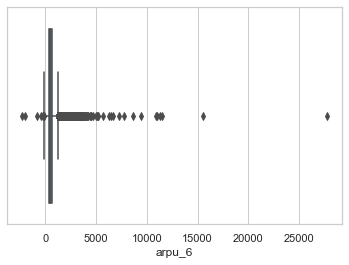

In [44]:
print("Box plot for arpu_6 is given below")

sns.boxplot(x=TelecomChurn_df['arpu_6'])

Box plot for onnet_mou_6 is given below


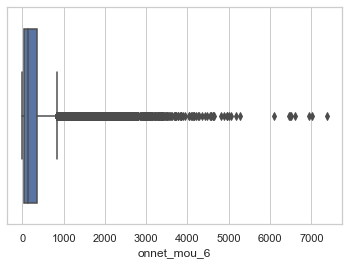

In [45]:
print("Box plot for onnet_mou_6 is given below")

sns.boxplot(x=TelecomChurn_df['onnet_mou_6'])

Box plot for offnet_mou_6 is given below


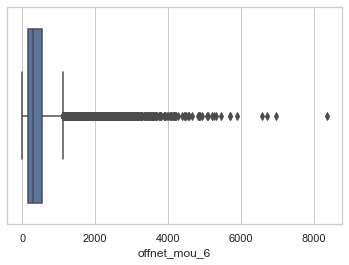

In [46]:
print("Box plot for offnet_mou_6 is given below")

sns.boxplot(x=TelecomChurn_df['offnet_mou_6'])

Box plot for roam_ic_mou_6 is given below


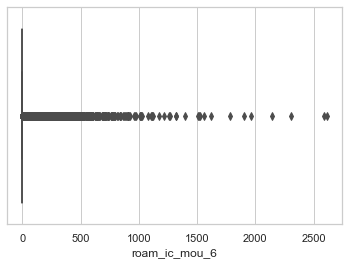

In [47]:
print("Box plot for roam_ic_mou_6 is given below")

sns.boxplot(x=TelecomChurn_df['roam_ic_mou_6'])

Box plot for loc_og_mou_6 is given below


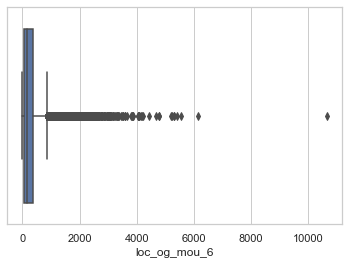

In [48]:
print("Box plot for loc_og_mou_6 is given below")

sns.boxplot(x=TelecomChurn_df['loc_og_mou_6'])


#### Observation:----

   1. There are few outliers present in the numerical columns of the dataframe
   2. The box plots confirms the same for few columns


In [49]:
print("The Shape of the TelecomChurn_df before removing the outliers are :-")
print(TelecomChurn_df.shape)
print("  ")

print("*****************************************************************")

print("  ")

The Shape of the TelecomChurn_df before removing the outliers are :-
(29979, 173)
  
*****************************************************************
  


In [50]:
#Removing the entries above 99 percentile and below 1 percentile
cols = [col for col in list(TelecomChurn_df) if col not in ['Is_Churn','mobile_number']]

for col in cols:
    ptls = TelecomChurn_df[col].quantile([0.01,0.99]).values
    TelecomChurn_df[col][TelecomChurn_df[col] <= ptls[0]] = ptls[0]
    TelecomChurn_df[col][TelecomChurn_df[col] >= ptls[1]] = ptls[1]
    


In [51]:
print("The Shape of the TelecomChurn_df after removing the outliers are :-")
print(TelecomChurn_df.shape)
print("  ")

print("*****************************************************************")

print("  ")


The Shape of the TelecomChurn_df after removing the outliers are :-
(29979, 173)
  
*****************************************************************
  


In [52]:
## lets check for any outlier values again in the DataFrame

TelecomChurn_df.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Is_Churned
count,"29,979.00","29,979.00","29,865.00","29,865.00","29,865.00","29,979.00","29,979.00","29,979.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,979.00","29,979.00","29,979.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,979.00","29,979.00","29,979.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,663.00","29,676.00","29,041.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,

In [53]:
# Lets plot box-plot for all the amount related variables

TelecomChurn_df.columns[TelecomChurn_df.columns.str.contains('rech_amt')].tolist()


['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

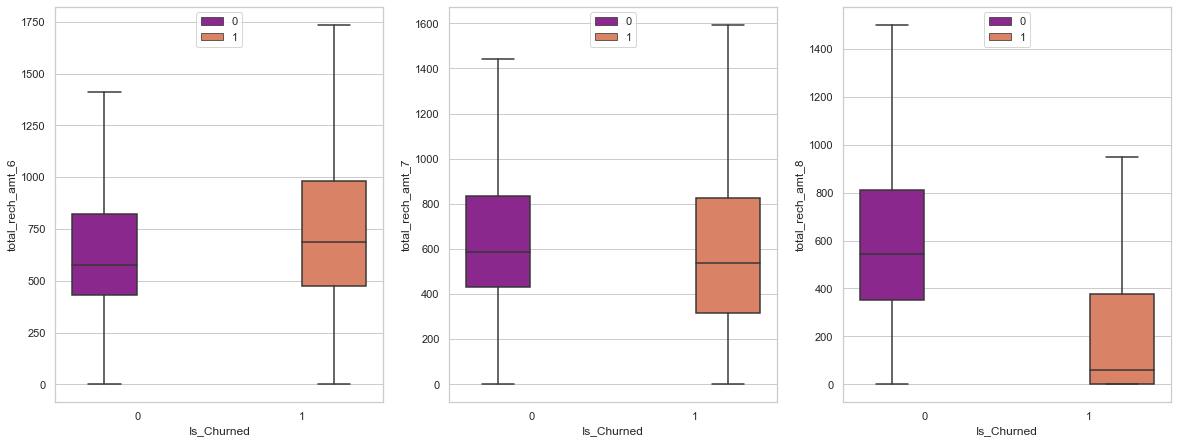

In [54]:
# Plotting a graph between the total_rech_amt_6,total_rech_amt_7,total_rech_amt_8 against 
# churning and non-churning customers

plt.figure(figsize=(20,16))

plt.subplot(2,3,1)
sns.boxplot(data=TelecomChurn_df, y="total_rech_amt_6",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,2)
sns.boxplot(data=TelecomChurn_df, y="total_rech_amt_7",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,3)
sns.boxplot(data=TelecomChurn_df, y="total_rech_amt_8",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))

plt.legend(loc='upper center')

plt.show()


#### observation :---

  1. The total recharge amount for churned Customers was maximum in the 6th month. 
  2. Then it got started to decrease. The least was in the 8th Month i.e Action Phase month.


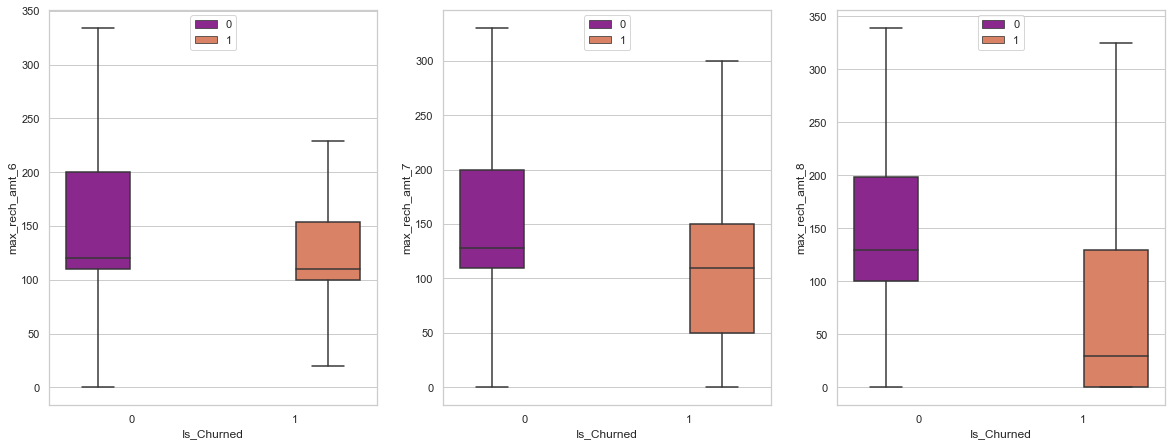

In [55]:
# Plotting a graph between the max_rech_amt_6,max_rech_amt_7,max_rech_amt_8 against 
# churning and non-churning customers

plt.figure(figsize=(20,16))

plt.subplot(2,3,1)
sns.boxplot(data=TelecomChurn_df, y="max_rech_amt_6",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,2)
sns.boxplot(data=TelecomChurn_df, y="max_rech_amt_7",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,3)
sns.boxplot(data=TelecomChurn_df, y="max_rech_amt_8",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))

plt.legend(loc='upper center')

plt.show()

#### observation :---

  1. The maximum recharge amount for churned Customers was maximum in the 6th month.
  2. Then it got started to decrease. The least was in the 8th Month i.e Action Phase month.

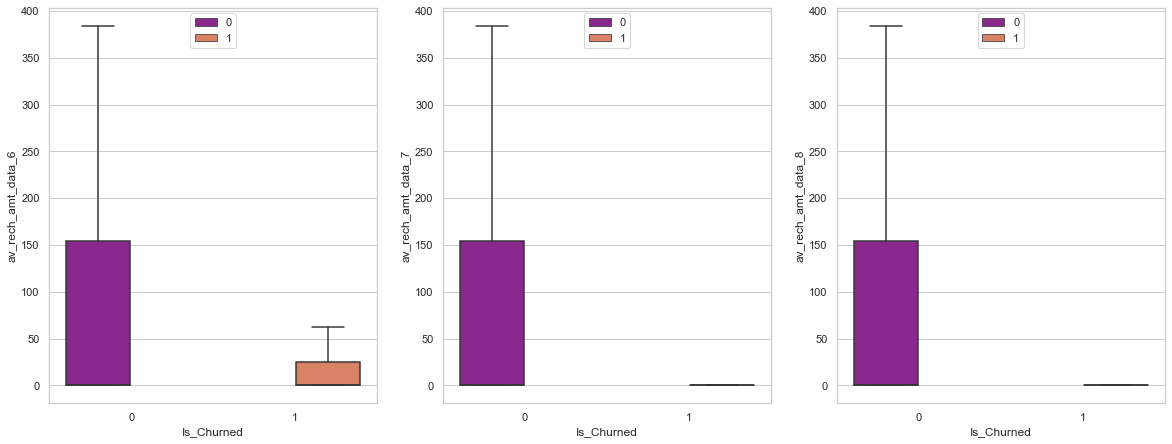

In [56]:
# Plotting a graph between the av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8 against 
# churning and non-churning customers

plt.figure(figsize=(20,16))

plt.subplot(2,3,1)
sns.boxplot(data=TelecomChurn_df, y="av_rech_amt_data_6",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,2)
sns.boxplot(data=TelecomChurn_df, y="av_rech_amt_data_7",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,3)
sns.boxplot(data=TelecomChurn_df, y="av_rech_amt_data_8",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))

plt.legend(loc='upper center')

plt.show()

#### observation :---

  1. The average recharged amount for data was highest in the 6th month for the churning customers.
  2. Then it got dropped to 0 in the 7th and 8th Month.

In [57]:
# Let's check other recharge related Columns:
other_recharge_cols = TelecomChurn_df.columns[TelecomChurn_df.columns.str.contains('rech_num|max_rech_data',regex=True)]

print("The other recharge related columns are :-------", other_recharge_cols)


The other recharge related columns are :------- Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'],
      dtype='object')


In [58]:
# lets check the % of NA values for other recharge related variables
round(100*(TelecomChurn_df.loc[:,other_recharge_cols].isnull().sum()/len(other_recharge_cols)),2)


total_rech_num_6                   0.00
total_rech_num_7                   0.00
total_rech_num_8                   0.00
max_rech_data_6                    0.00
max_rech_data_7                    0.00
max_rech_data_8                    0.00
dtype: float64

#### Observation:----

  1. There are other 6 columns related to recharge.
  2. There are no null values present in them as we have already imputed the missing values with 0


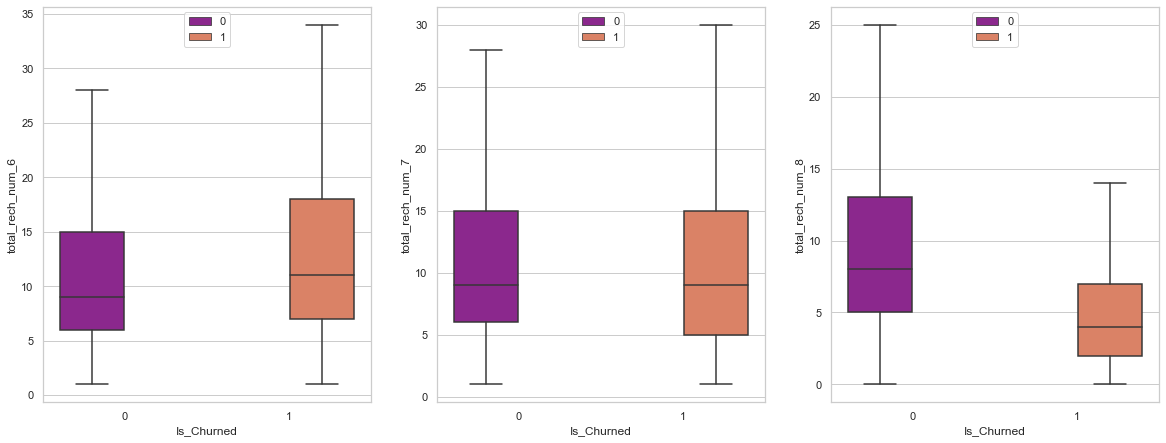

In [59]:
# Plotting a graph between the total_rech_num_6,total_rech_num_7,total_rech_num_8 against 
# churning and non-churning customers

plt.figure(figsize=(20,16))

plt.subplot(2,3,1)
sns.boxplot(data=TelecomChurn_df, y="total_rech_num_6",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,2)
sns.boxplot(data=TelecomChurn_df, y="total_rech_num_7",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,3)
sns.boxplot(data=TelecomChurn_df, y="total_rech_num_8",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))

plt.legend(loc='upper center')

plt.show()

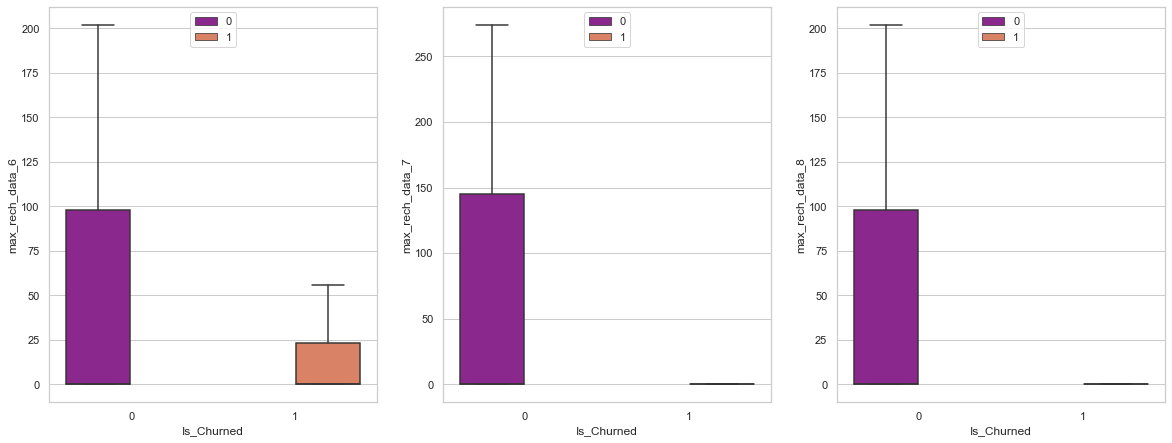

In [60]:
# Plotting a graph between the max_rech_data_6,max_rech_data_7,max_rech_data_8 against 
# churning and non-churning customers

plt.figure(figsize=(20,16))

plt.subplot(2,3,1)
sns.boxplot(data=TelecomChurn_df, y="max_rech_data_6",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,2)
sns.boxplot(data=TelecomChurn_df, y="max_rech_data_7",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,3)
sns.boxplot(data=TelecomChurn_df, y="max_rech_data_8",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))

plt.legend(loc='upper center')

plt.show()

#### Observation :----

   1. There is a signicant drop in the total recharge number in the 8th month i.e. action phase for churned customers.
   2. The maximum recharge data is non-zero n the 6th Month but it dropped to 0 in the 7th and 8th month for churned customers.


In [61]:
TelecomChurn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Is_Churned
7,7000701601,109,0.00,0.00,0.00,2014-06-30,2014-07-31,2014-08-31,"1,069.18","1,349.85","1,988.08",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.00,0.00,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.00,0.00,0.00,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,"1,580.00",790.00,"2,342.22",1000,790,951,2014-06-27,2014-07-25,2014-08-26,0,0.00,619,NaT,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,2.00,0,0,0,0.00,0,0,0,0,0,0,0,0,2.00,2.00,2.00,802,57.74,19.38,18.74,0.00,1
8,7001524846,109,0.00,0.00,0.00,2014-06-30,2014-07-31,2014-08-31,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00

In [62]:
## lets now check the 2g and 3g related variables to check the variation for the churned customers

cols_2g_3g = TelecomChurn_df.columns[TelecomChurn_df.columns.str.contains('2g|3g',regex=True)]

print('The 2g and 3g columns in the dataFrame are :------' ,cols_2g_3g)
print('')


The 2g and 3g columns in the dataFrame are :------ Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object')



In [63]:
## Lets check for the null values in the dataframe for the above columns

round(100*(TelecomChurn_df.loc[:,cols_2g_3g].isnull().sum()/len(TelecomChurn_df.loc[:,cols_2g_3g])),2)


count_rech_2g_6                   0.00
count_rech_2g_7                   0.00
count_rech_2g_8                   0.00
count_rech_3g_6                   0.00
count_rech_3g_7                   0.00
count_rech_3g_8                   0.00
vol_2g_mb_6                       0.00
vol_2g_mb_7                       0.00
vol_2g_mb_8                       0.00
vol_3g_mb_6                       0.00
vol_3g_mb_7                       0.00
vol_3g_mb_8                       0.00
arpu_3g_6                         0.00
arpu_3g_7                         0.00
arpu_3g_8                         0.00
arpu_2g_6                         0.00
arpu_2g_7                         0.00
arpu_2g_8                         0.00
monthly_2g_6                      0.00
monthly_2g_7                      0.00
monthly_2g_8                      0.00
sachet_2g_6                       0.00
sachet_2g_7                       0.00
sachet_2g_8                       0.00
monthly_3g_6                      0.00
monthly_3g_7             

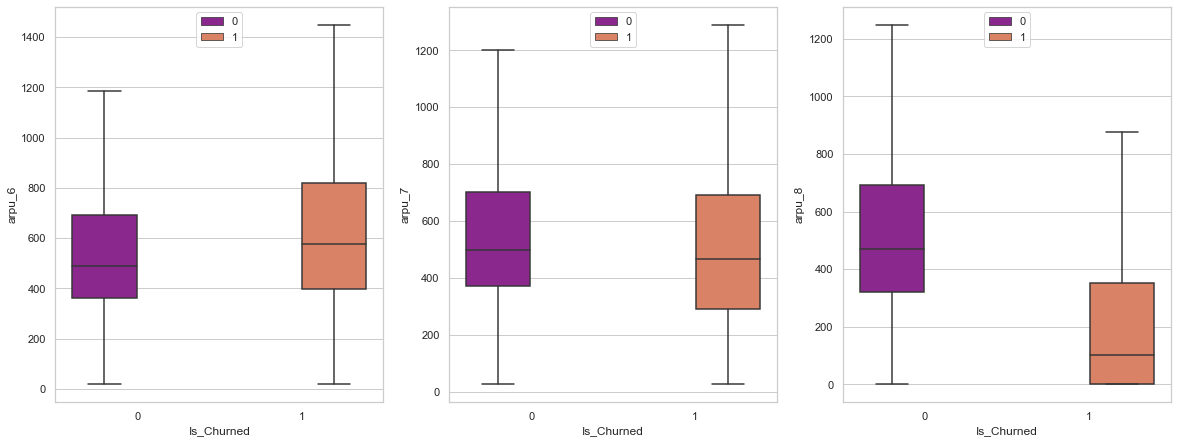

In [64]:
## Lets plot a graph for the  ARPU (Average revenue per user) columns against the churning and Non-Churning customers

plt.figure(figsize=(20,16))

plt.subplot(2,3,1)
sns.boxplot(data=TelecomChurn_df, y="arpu_6",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,2)
sns.boxplot(data=TelecomChurn_df, y="arpu_7",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,3)
sns.boxplot(data=TelecomChurn_df, y="arpu_8",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))

plt.legend(loc='upper center')

plt.show()



#### Observation :-----

   1. Average revenue per user shows a drop from 6th to 7th month and was minimum in the 8th month.
   2. Average revenue per user remained almost consistent for the non-churners.


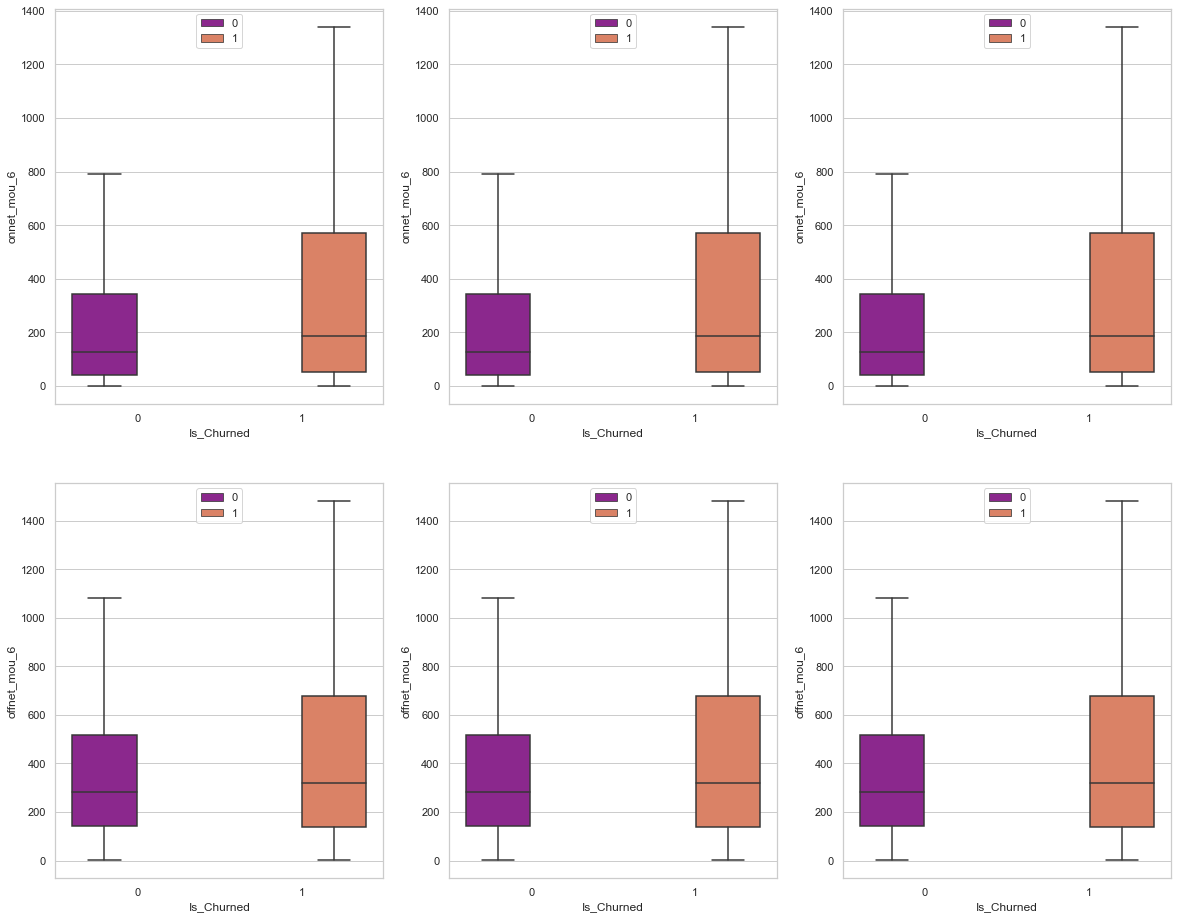

In [65]:
# Plotting a graph for the onnet_mou and offnet_mou columns against churning and non-churning customers

plt.figure(figsize=(20,16))

plt.subplot(2,3,1)
sns.boxplot(data=TelecomChurn_df, y="onnet_mou_6",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,2)
sns.boxplot(data=TelecomChurn_df, y="onnet_mou_6",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,3)
sns.boxplot(data=TelecomChurn_df, y="onnet_mou_6",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))

plt.legend(loc='upper center')




plt.subplot(2,3,4)
sns.boxplot(data=TelecomChurn_df, y="offnet_mou_6",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,5)
sns.boxplot(data=TelecomChurn_df, y="offnet_mou_6",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,6)
sns.boxplot(data=TelecomChurn_df, y="offnet_mou_6",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))

plt.legend(loc='upper center')



plt.show()


#### Observation :-----

   1. The offnet and onnet columns remains consistent for all the months both churners and Non-Churners.


In [66]:
TelecomChurn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Is_Churned
7,7000701601,109,0.00,0.00,0.00,2014-06-30,2014-07-31,2014-08-31,"1,069.18","1,349.85","1,988.08",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.00,0.00,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.00,0.00,0.00,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,"1,580.00",790.00,"2,342.22",1000,790,951,2014-06-27,2014-07-25,2014-08-26,0,0.00,619,NaT,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,2.00,0,0,0,0.00,0,0,0,0,0,0,0,0,2.00,2.00,2.00,802,57.74,19.38,18.74,0.00,1
8,7001524846,109,0.00,0.00,0.00,2014-06-30,2014-07-31,2014-08-31,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00

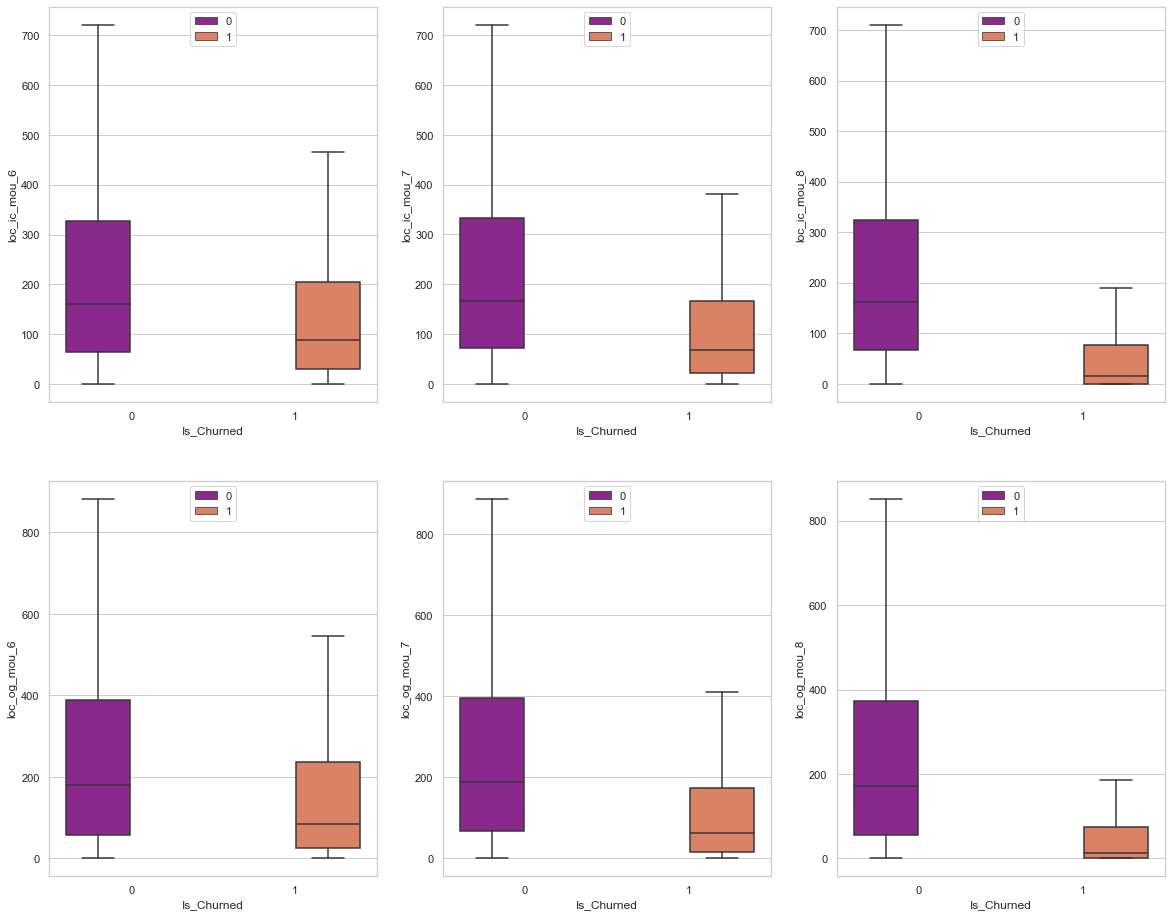

In [67]:
# Plotting a graph between the loc_ic_mou and loc_og_mou columns against churning and non-churning customers

plt.figure(figsize=(20,16))

plt.subplot(2,3,1)
sns.boxplot(data=TelecomChurn_df, y="loc_ic_mou_6",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,2)
sns.boxplot(data=TelecomChurn_df, y="loc_ic_mou_7",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,3)
sns.boxplot(data=TelecomChurn_df, y="loc_ic_mou_8",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))

plt.legend(loc='upper center')




plt.subplot(2,3,4)
sns.boxplot(data=TelecomChurn_df, y="loc_og_mou_6",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,5)
sns.boxplot(data=TelecomChurn_df, y="loc_og_mou_7",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,6)
sns.boxplot(data=TelecomChurn_df, y="loc_og_mou_8",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))

plt.legend(loc='upper center')



plt.show()


#### Observation :-----

   1. local incoming and outgoing calls shows a drop from 6th to 7th month and was minimum in the 8th month.
   2. local incoming and outgoing calls remained almost consistent for the non-churners.


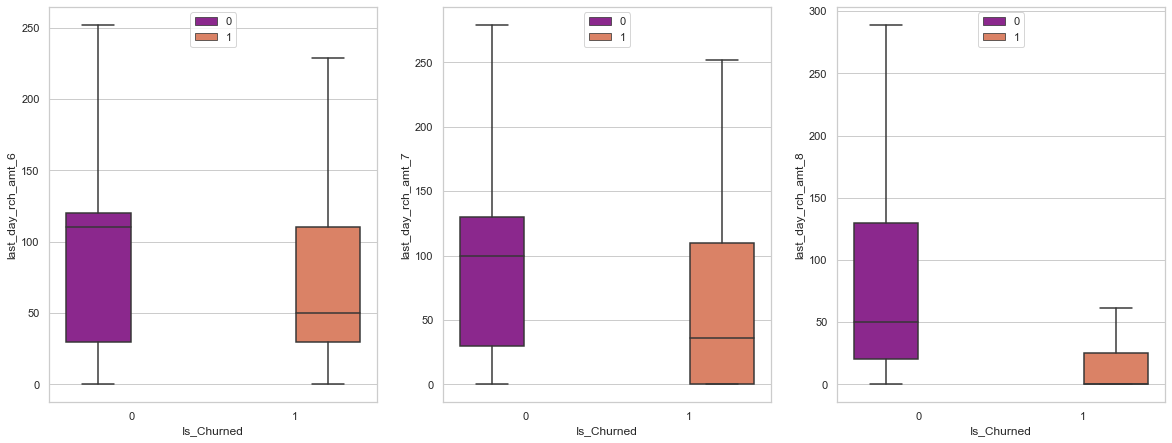

In [68]:
# Plotting a graph for last_day_rch_amt column against churning and non-churning customers

plt.figure(figsize=(20,16))

plt.subplot(2,3,1)
sns.boxplot(data=TelecomChurn_df, y="last_day_rch_amt_6",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,2)
sns.boxplot(data=TelecomChurn_df, y="last_day_rch_amt_7",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))
plt.legend(loc='upper center')

plt.subplot(2,3,3)
sns.boxplot(data=TelecomChurn_df, y="last_day_rch_amt_8",x="Is_Churned",hue="Is_Churned",
showfliers=False,palette=("plasma"))

plt.legend(loc='upper center')

plt.show()

#### Observation :-----

   1. Last day recharge amount shows a drop from 6th to 7th month and was minimum in the 8th month.
   2. Last day recharge amount remained almost consistent for the non-churners.


In [69]:
# lets check the effect of Volume based cost on the churing and Non-Churning customers

vbc_cols = TelecomChurn_df.columns[TelecomChurn_df.columns.str.contains('vbc_',regex=True)]
vbc_cols.tolist()


['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [70]:
# Lest rename the columns to the 6,7,8,9 format for a better understanding
TelecomChurn_df.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                                ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
TelecomChurn_df.drop('vbc_3g_9',axis=1,inplace=True)

In [71]:
# lets check the dataframe for the new modified columns 
TelecomChurn_df.head()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Is_Churned
7,7000701601,109,0.00,0.00,0.00,2014-06-30,2014-07-31,2014-08-31,"1,069.18","1,349.85","1,988.08",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.00,0.00,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.00,0.00,0.00,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,"1,580.00",790.00,"2,342.22",1000,790,951,2014-06-27,2014-07-25,2014-08-26,0,0.00,619,NaT,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,2.00,0,0,0,0.00,0,0,0,0,0,0,0,0,2.00,2.00,2.00,802,57.74,19.38,18.74,1
8,7001524846,109,0.00,0.00,0.00,2014-06-30,2014-07-31,2014-08-31,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.0

In [72]:
columns_list=['vbc_3g_6','vbc_3g_7','vbc_3g_8']
columns_list

['vbc_3g_6', 'vbc_3g_7', 'vbc_3g_8']

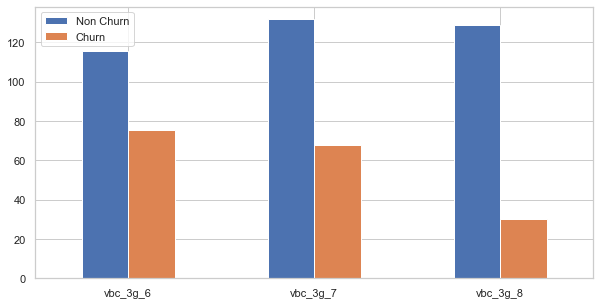

In [73]:
TelecomChurn_df_0 = TelecomChurn_df[TelecomChurn_df.Is_Churned==0].filter(columns_list)
TelecomChurn_df_1 = TelecomChurn_df[TelecomChurn_df.Is_Churned==1].filter(columns_list)

mean_df_0 = pd.DataFrame([TelecomChurn_df_0.mean()],index={'Non Churn'})
mean_df_1 = pd.DataFrame([TelecomChurn_df_1.mean()],index={'Churn'})

frames = [mean_df_0, mean_df_1]
mean_bar = pd.concat(frames)

mean_bar.T.plot.bar(figsize=(10,5),rot=0)
plt.show()

#### Observation :-----
   1. Volume based cost for 3g services is better for Non-churned customers.
   2. There is drop in the vlume based cost for the churning customers in the 8th month. 


In [74]:
TelecomChurn_df.shape

(29979, 172)

In [75]:
# Lets check the Non- Categorical columns after imputation for missing values
print(" ")

print("The Percentage of null values in the Non-categorical columns are -----")
print(" ")
print("*********************************************************************************")

print(" ")

print(round(((TelecomChurn_df.select_dtypes(exclude='object').isnull().sum()/len(TelecomChurn_df.index))*100),2))

 
The Percentage of null values in the Non-categorical columns are -----
 
*********************************************************************************
 
mobile_number                    0.00
circle_id                        0.00
loc_og_t2o_mou                   0.38
std_og_t2o_mou                   0.38
loc_ic_t2o_mou                   0.38
                         ...         
aon                              0.00
vbc_3g_8                         0.00
vbc_3g_7                         0.00
vbc_3g_6                         0.00
Is_Churned                       0.00
Length: 172, dtype: float64


In [77]:
## Lets check the percentage of null values present in the dataframe for all the columns
cols_null_check_list = list(TelecomChurn_df)
columns_null = []
for i in TelecomChurn_df.isnull().sum()*100/TelecomChurn_df.shape[0]:
    columns_null.append(i)
cols_null_df = pd.DataFrame({'columns': cols_null_check_list, '% null': columns_null})
cols_null_df[cols_null_df['% null'] > 0]

,columns,% null
2,loc_og_t2o_mou,0.38
3,std_og_t2o_mou,0.38
4,loc_ic_t2o_mou,0.38
6,last_date_of_month_7,0.10
7,last_date_of_month_8,0.52
...,...,...
114,date_of_last_rech_7,0.38
115,date_of_last_rech_8,1.98
119,date_of_last_rech_data_6,62.02
120,date_of_last_rech_data_7,61.13


In [78]:
mou_cols = TelecomChurn_df.columns[TelecomChurn_df.columns.str.contains('mou')]
mou_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_o

In [79]:
# replacing null values by 0 for minutes of usage variables
TelecomChurn_df.loc[:,mou_cols] = TelecomChurn_df.loc[:,mou_cols].replace(np.NaN,0)

In [80]:
## Lets check the percentage of null values present in the dataframe for all the columns
cols_null_check_list = list(TelecomChurn_df)
columns_null = []
for i in TelecomChurn_df.isnull().sum()*100/TelecomChurn_df.shape[0]:
    columns_null.append(i)
cols_null_df = pd.DataFrame({'columns': cols_null_check_list, '% null': columns_null})
cols_null_df[cols_null_df['% null'] > 0]

,columns,% null
6,last_date_of_month_7,0.10
7,last_date_of_month_8,0.52
59,og_others_6,1.05
60,og_others_7,1.01
61,og_others_8,3.13
101,ic_others_6,1.05
102,ic_others_7,1.01
103,ic_others_8,3.13
113,date_of_last_rech_6,0.21
114,date_of_last_rech_7,0.38


In [81]:
# Lets select the *others column into a list and then impute the null values as 0

oth_cols = TelecomChurn_df.columns[TelecomChurn_df.columns.str.contains('oth')]
oth_cols

Index(['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8'],
      dtype='object')

In [82]:
TelecomChurn_df.loc[:,oth_cols] = TelecomChurn_df.loc[:,oth_cols].replace(np.NaN,0)

In [83]:
## Lets check the percentage of null values present in the dataframe for all the columns
cols_null_check_list = list(TelecomChurn_df)
columns_null = []
for i in TelecomChurn_df.isnull().sum()*100/TelecomChurn_df.shape[0]:
    columns_null.append(i)
cols_null_df = pd.DataFrame({'columns': cols_null_check_list, '% null': columns_null})
cols_null_df[cols_null_df['% null'] > 0]

,columns,% null
6,last_date_of_month_7,0.10
7,last_date_of_month_8,0.52
113,date_of_last_rech_6,0.21
114,date_of_last_rech_7,0.38
115,date_of_last_rech_8,1.98
119,date_of_last_rech_data_6,62.02
120,date_of_last_rech_data_7,61.13
121,date_of_last_rech_data_8,60.84


## Model Building 1 :---- Customer Churn Prediction

In [84]:
## Lets take a backup of the dataframe for future use

TelecomChurn_Copy_df = TelecomChurn_df.copy()


In [85]:

print('The shape of the original dataframe is :------- ',TelecomChurn_df.shape)

print(" ")

print('The shape of the original dataframe is :------- ',TelecomChurn_Copy_df.shape)

print(" ")


The shape of the original dataframe is :-------  (29979, 172)
 
The shape of the original dataframe is :-------  (29979, 172)
 


## Dimensionality Reduction using PCA :-----

In [86]:
## Lets split the feature and Response variable

from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = TelecomChurn_df.drop(['Is_Churned','mobile_number'],axis=1)

X.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
7,109,0.00,0.00,0.00,2014-06-30,2014-07-31,2014-08-31,"1,069.18","1,349.85","1,988.08",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.00,0.00,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.00,0.00,0.00,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,"1,580.00",790.00,"2,342.22",1000,790,951,2014-06-27,2014-07-25,2014-08-26,0,0.00,619,NaT,NaT,NaT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,2.00,0,0,0,0.00,0,0,0,0,0,0,0,0,2.00,2.00,2.00,802,57.74,19.38,18.74
8,109,0.00,0.00,0.00,2014-06-30,2014-07-31,2014-08-31,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0

In [87]:
# Putting response variable to y
Y = TelecomChurn_df['Is_Churned']

Y.head()

7     1
8     0
13    0
16    0
17    0
Name: Is_Churned, dtype: int32

In [88]:
# Lets calculate the churned and Unchurned rate

print('The churned and Unchurned Rate is given below:------')
round(100*(Y.value_counts()/len(Y.index)),2)


The churned and Unchurned Rate is given below:------


0                  91.36
1                   8.64
Name: Is_Churned, dtype: float64

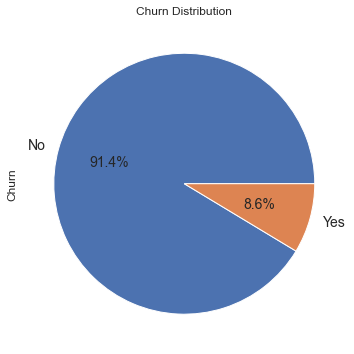

In [89]:
# Lets create a pie chart for the Churn/Unchurn Rate Distribution

pie_chart = TelecomChurn_df['Is_Churned'].value_counts()*100.0 /len(TelecomChurn_df)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

#### Observation:---

   1. The response variable i.e. Is_Churned column is now separated from the dataframe for better analysis.
   2. The churned rate is close to 8.6% and unchurned rate is close to 91 %
   3. There seems to be some class imbalance which we will have to balance using class_weight.

In [90]:
# Removing the date fields as they have missing vaues in them

X.filter(regex='date_').columns

X.drop(X.filter(regex='date_').columns,axis=1,inplace=True)



In [91]:
# Lets check the dataset for proper scaling

X.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
count,"29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00

#### Observation :---

   1. The scaling seems to be improper. Lets scale the variables


In [92]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale_final= pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scale_final.head()


,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
0,0.00,0.00,0.00,0.00,1.46,2.28,3.95,-0.57,-0.57,-0.51,0.10,0.35,-0.10,0.03,0.56,0.52,-0.02,-0.09,0.32,-0.22,-0.35,-0.26,0.62,1.29,-0.00,3.82,3.30,3.39,-0.34,-0.34,-0.33,0.45,0.80,0.00,-0.50,-0.45,-0.43,-0.40,-0.46,-0.36,0.85,3.13,2.87,0.00,0.00,0.00,-0.59,-0.57,-0.48,-0.16,-0.13,2.56,-0.07,-0.50,0.04,-0.39,0.00,0.00,-0.31,-0.14,-0.43,-0.05,-0.32,-0.34,0.34,0.37,-0.15,4.41,2.64,0.89,0.71,0.42,-0.15,0.74,-0.05,0.57,1.07,1.59,2.02,6.72,4.08,2.93,0.00,0.00,0.00,1.52,1.34,1.73,1.03,0.78,0.44,0.98,-0.20,-0.26,-0.19,0.16,0.69,5.40,4.14,4.88,-0.81,-0.77,-0.35,2.21,0.25,3.88,5.49,3.97,5.45,-0.92,-0.90,4.78,-0.51,-0.51,-0.53,-0.58,-0.59,-0.57,-0.41,-0.43,-0.44,-0.38,-0.37,-0.36,-0.55,-0.55,-0.54,-0.34,-0.33,-0.32,-0.38,-0.39,-0.38,-0.36,-0.37,-0.36,-0.39,-0.39,-0.37,0.78,0.79,0.80,-0.34,-0.34,-0.32,-0.34,-0.35,-0.37,-0.33,-0.33,-0.32,-0.23,-0.23,-0.22,0.74,0.75,0.74,-0.47,-0.20,-0.32,-0.30
1,0.00,0.00,0.00,0.00,-0.59,-0.26,-1.04,0.31,0.13,-0.56,-0.75,-0.78,-0.56,-0.29,-0.26,-0.26,-0.31,-0.28,-0.28,1.31,0.83,-0.46,-0.44,-0.51,-0.55,-0.43,-0.43,-0.42,-0.34,-0.34,1.27,0.31,0.04,-0.61,-0.18,-0.16,-0.40,-0.51,-0.52,-0.28,-0.25,-0.24,-0.24,0.00,0.00,0.00,-0.46,-0.45,-0.45,-0.16,-0.17,-0.15,-0.46,-0.50,0.34,-0.39,0.00,0.00,-0.28,-0.43,-0.71,-0.40,-0.54,-0.62,-0.53,-0.78,-0.74,-0.45,-0.45,-0.45,-0.58,-0.81,-0.80,-0.40,-0.39,-0.38,-0.10,-0.41,-0.45,-0.28,-0.28,-0.28,0.00,0.00,0.00,-0.27,-0.47,-0.49,-0.62,-0.87,-0.86,-0.44,-0.20,-0.26,-0.26,-0.27,-0.25,-0.26,-0.26,-0.26,0.81,1.05,0.45,-0.61,-0.20,-1.07,-0.52,-0.12,-0.90,-0.46,-0.90,-0.74,-0.51,0.52,1.11,-0.58,1.02,-0.33,-0.41,0.84,1.49,-0.38,-0.37,-0.36,-0.55,0.50,-0.11,-0.34,1.35,-0.32,-0.38,0.77,-0.37,-0.36,-0.

In [93]:
X_scale_final.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
count,"29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00","29,979.00

In [94]:
# Lets calculate the churned and Unchurned rate

print('The churned and Unchurned Rate is given below:------')
round(100*(Y.value_counts()/len(Y.index)),2)

The churned and Unchurned Rate is given below:------


0                  91.36
1                   8.64
Name: Is_Churned, dtype: float64

In [95]:
## Lets divide the data into train and test dataset and then perform PCA

X_train, X_test, y_train, y_test = train_test_split(X_scale_final, Y, train_size=0.7, test_size=0.3, random_state=100)
print("X_scale_final shape:",X_scale_final.shape)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_scale_final shape: (29979, 161)
X_train shape: (20985, 161)
y_train shape: (20985,)
X_test shape: (8994, 161)
y_test shape: (8994,)


### Implementing PCA

In [96]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)


In [97]:
#Doing the PCA on the training data
pca.fit(X_train)
pca.components_

array([[ 9.85937493e-17, -1.11022302e-16,  0.00000000e+00, ...,
         1.41811882e-01,  1.40573498e-01,  1.34336781e-01],
       [-1.69553687e-17, -2.77555756e-17, -2.22044605e-16, ...,
        -2.18401516e-02, -2.77379423e-02, -2.84042278e-02],
       [-2.22043452e-18,  1.00613962e-16,  1.66533454e-16, ...,
         2.77859020e-02,  2.44540452e-02,  2.03172023e-02],
       ...,
       [-0.00000000e+00, -1.74136485e-01, -2.31461889e-01, ...,
        -1.73472348e-18, -1.66560559e-16,  5.20417043e-17],
       [ 0.00000000e+00, -6.11362135e-02, -2.00636347e-01, ...,
        -1.95156391e-18,  7.02563008e-17, -3.98986399e-17],
       [-1.00000000e+00,  2.21250832e-29,  6.61518417e-30, ...,
        -6.33904595e-16,  6.35518477e-16, -4.01333864e-16]])

In [98]:
# Lets check the PC values for the features

colnames = list(X_train.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df.head(10)

,PC1,PC2,Feature
0,0.00,-0.00,circle_id
1,-0.00,-0.00,loc_og_t2o_mou
2,0.00,-0.00,std_og_t2o_mou
3,0.00,0.00,loc_ic_t2o_mou
4,0.05,0.09,arpu_6
5,0.06,0.11,arpu_7
6,0.07,0.12,arpu_8
7,-0.05,0.04,onnet_mou_6
8,-0.05,0.05,onnet_mou_7
9,-0.04,0.06,onnet_mou_8


In [99]:
# lets check the variance ratio
pca.explained_variance_ratio_

array([1.37519671e-01, 9.27344411e-02, 7.24335191e-02, 5.62000269e-02,
       4.34735318e-02, 3.19594117e-02, 2.91779189e-02, 2.50770309e-02,
       2.49650042e-02, 2.40845855e-02, 2.17165922e-02, 2.00749239e-02,
       1.87260654e-02, 1.66362818e-02, 1.59365089e-02, 1.50258103e-02,
       1.43664828e-02, 1.42078655e-02, 1.35481204e-02, 1.31561076e-02,
       1.05738525e-02, 1.01514063e-02, 9.57490217e-03, 9.33098518e-03,
       9.19695423e-03, 9.07242024e-03, 8.72612607e-03, 8.33538857e-03,
       7.33616588e-03, 7.21341659e-03, 6.94712188e-03, 6.76710051e-03,
       6.51093388e-03, 6.09152588e-03, 5.86136082e-03, 5.75213677e-03,
       5.63098991e-03, 5.59333677e-03, 5.45721538e-03, 5.34157061e-03,
       5.22937194e-03, 5.01485739e-03, 4.92398260e-03, 4.83228753e-03,
       4.66736375e-03, 4.51445984e-03, 4.38692506e-03, 4.35304598e-03,
       3.93643914e-03, 3.86529053e-03, 3.72028565e-03, 3.53908071e-03,
       3.47758223e-03, 3.30351398e-03, 3.19212374e-03, 3.08379068e-03,
      

In [100]:
# lets check the cumulative variance ratio
np.cumsum(pca.explained_variance_ratio_)

array([0.13751967, 0.23025411, 0.30268763, 0.35888766, 0.40236119,
       0.4343206 , 0.46349852, 0.48857555, 0.51354056, 0.53762514,
       0.55934173, 0.57941666, 0.59814272, 0.614779  , 0.63071551,
       0.64574132, 0.66010781, 0.67431567, 0.68786379, 0.7010199 ,
       0.71159375, 0.72174516, 0.73132006, 0.74065105, 0.749848  ,
       0.75892042, 0.76764655, 0.77598194, 0.7833181 , 0.79053152,
       0.79747864, 0.80424574, 0.81075667, 0.8168482 , 0.82270956,
       0.8284617 , 0.83409269, 0.83968602, 0.84514324, 0.85048481,
       0.85571418, 0.86072904, 0.86565302, 0.87048531, 0.87515267,
       0.87966713, 0.88405406, 0.8884071 , 0.89234354, 0.89620883,
       0.89992912, 0.9034682 , 0.90694578, 0.9102493 , 0.91344142,
       0.91652521, 0.91948664, 0.922322  , 0.92500359, 0.92765336,
       0.93022452, 0.93277487, 0.93524387, 0.93765034, 0.93993993,
       0.94214924, 0.94431436, 0.94638823, 0.94842078, 0.95042354,
       0.9524003 , 0.95434957, 0.95629515, 0.95821919, 0.96008

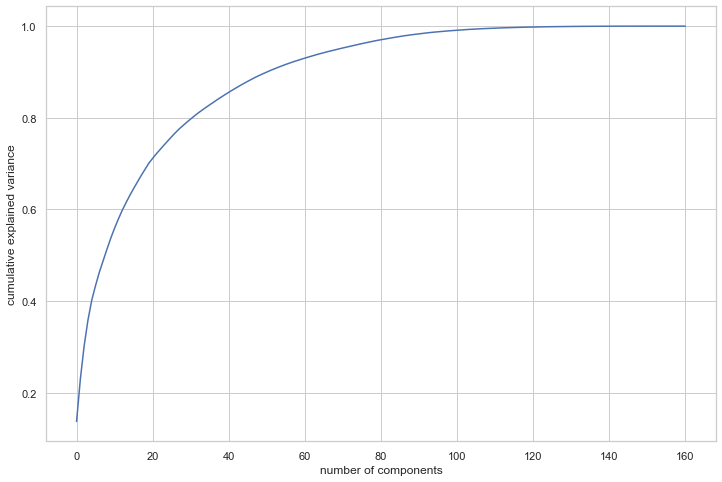

In [101]:
#Making the screeplot - plotting the cumulative variance against the number of components
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Observation :----

   1. 59 components are enough to explain 90% variance in the dataset


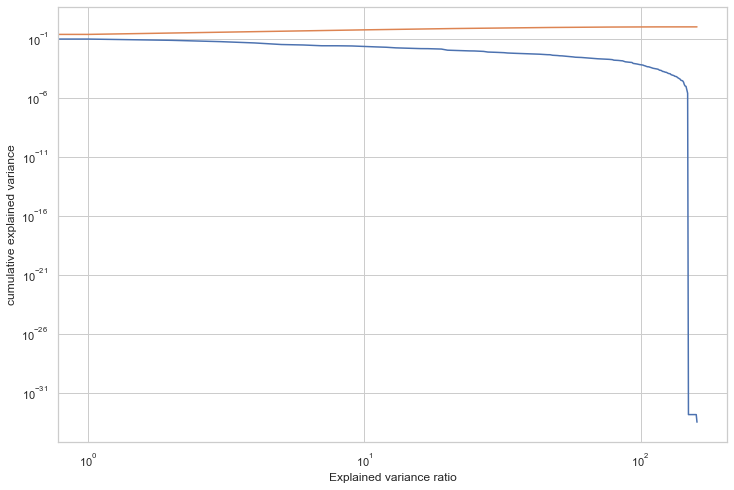

In [102]:
#Making the screeplot - plotting the cumulative variance against the explained variance ration
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize = (12,8))
plt.yscale('log')
plt.xscale('log')
plt.plot(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Explained variance ratio')
plt.ylabel('cumulative explained variance')
plt.show()


In [103]:
## Lets use the incremental PCA for efficiency. using initial model, we got to know that 59 components will be 
## enough to explan 90% variance in the dataset

from sklearn.decomposition import IncrementalPCA
pca_final_df = IncrementalPCA(n_components=59)


In [104]:
# Lets fit the model with new PCA components

X_train_pca = pd.DataFrame(pca_final_df.fit_transform(X_train))
X_train_pca.shape


(20985, 59)

In [105]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())


In [106]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)



max corr: 0.0053383157182904425 , min corr:  -0.008288440923026542


In [107]:
#Applying selected components to the test data - 59 components
X_test_pca = pca_final_df.transform(X_test)
X_test_pca.shape

(8994, 59)

In [108]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_test_pca.transpose())


In [109]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)


max corr: 0.05103409004109535 , min corr:  -0.05317258024676173


#### Observation:----

   1. There is indeed no correlation between the principal components in the training data after applying PCA
   2. There is indeed no correlation between the principal components in the testing data after applying PCA


## Logistic Regression with PCA dataset

In [110]:
# Since we have earlier seen that the dataset is imbalanced with a very low number of churn customers, 
# we will use appropriate class weights to handle class imbalance.
# Also since identifying the churn customers is the business priority here, we can't afford missing any churn customers.
# So the metric for deciding model performance should be recall or sensitivity in this scenario. 
# We need to reduce the false negatives count.

In [111]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , roc_auc_score

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train_pca,y_train)

LogisticRegression(class_weight='balanced')

In [112]:
# Making prediction on the train data

y_pred_train = lr.predict(X_train_pca)
y_pred_train[:5]


array([0, 0, 0, 0, 0])

In [113]:

# Making prediction on the test data
y_pred_test = lr.predict(X_test_pca)
y_pred_test[:5]


array([0, 0, 0, 0, 1])

In [114]:

print("Accuracy for Test set:{}".format(accuracy_score(y_test,y_pred_test)))
print("Accuracy for Train set:{}".format(accuracy_score(y_train,y_pred_train)))

Accuracy for Test set:0.8169891038470091
Accuracy for Train set:0.8232547057421968


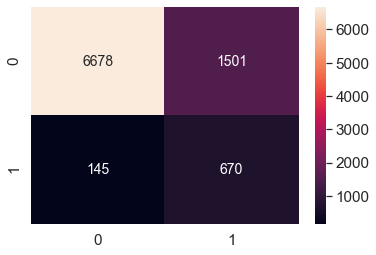

In [115]:

Confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_test), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(Confusion_matrix_df, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()


In [116]:

confusion = confusion_matrix(y_test,y_pred_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives



In [117]:

print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))


Sensitivity:0.822
Specificity:0.816


In [118]:

pred_probs_test = lr.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(roc_auc_score(y_test, pred_probs_test)))



AUC:0.89


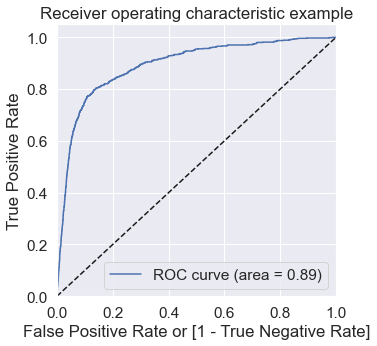

In [119]:
### Lets plot the ROC graph to understand the feasibility of the model.

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve( y_test, pred_probs_test,drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_test, pred_probs_test )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



### Observation :----

   1. The accuracy for Test set is 81% and the accuracy for Train set is 82%.
   2. The Sensitivity was around 82.2% and the Specificity was around 81.7%
   3. The AUC value was around 89%
   

### Decision Tree On PCA Datasets

In [120]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
dt_default = DecisionTreeClassifier(class_weight='balanced')
dt_default.fit(X_train_pca, y_train)



DecisionTreeClassifier(class_weight='balanced')

In [121]:

# Making predictions
y_pred_test = dt_default.predict(X_test_pca)


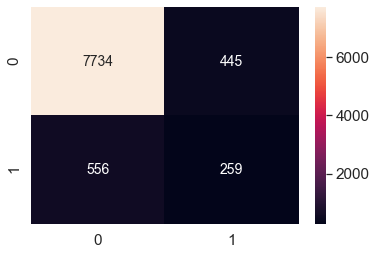

In [122]:
## Lets Derive the confusion matrix 

confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_test), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix_df, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()

In [123]:


confusion = confusion_matrix(y_test,y_pred_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives



In [124]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred_test),3)))


Sensitivity:0.318
Specificity:0.946
Accuracy:0.889


#### Observation:-----

    1. Sensitivity:0.301
    2. Specificity:0.945
    3. Accuracy:0.892
    4. We are getting very low value of sensitivity using the default model of decision tree. Lets tune the hyper-parameters          for an efficient model
    

### Hyperparameter Tuning

In [125]:
########## lets tune hyper parameterss

# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                    verbose = 1,
                    n_jobs=-1,
                    scoring="accuracy",
                    return_train_score=True)


tree.fit(X_train_pca,y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:  1.3min finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(1, 40)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [126]:
y_train.shape

(20985,)

In [127]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.48,0.03,0.01,0.00,1,{'max_depth': 1},0.79,0.78,0.76,0.79,0.71,0.77,0.03,37,0.79,0.79,0.76,0.79,0.72,0.77,0.03
1,0.97,0.11,0.01,0.00,2,{'max_depth': 2},0.69,0.66,0.84,0.68,0.81,0.74,0.07,39,0.71,0.67,0.84,0.67,0.81,0.74,0.07
2,1.66,0.23,0.02,0.01,3,{'max_depth': 3},0.80,0.76,0.73,0.73,0.68,0.74,0.04,38,0.81,0.77,0.73,0.72,0.68,0.74,0.04
3,1.85,0.36,0.01,0.00,4,{'max_depth': 4},0.84,0.78,0.80,0.82,0.79,0.81,0.02,33,0.85,0.80,0.81,0.83,0.79,0.82,0.02
4,2.31,0.34,0.02,0.01,5,{'max_depth': 5},0.81,0.78,0.78,0.80,0.72,0.78,0.03,36,0.84,0.79,0.78,0.81,0.74,0.79,0.03


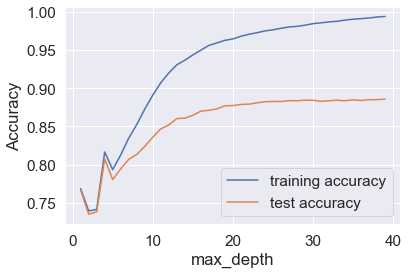

In [128]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training accuracy")

plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test accuracy")

plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


##### The maximum depth seems to be 15 or 20

In [129]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                    verbose = 1,
                    n_jobs=-1,
                    scoring="accuracy",
                    return_train_score=True)

tree.fit(X_train_pca,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   17.1s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [130]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.79,0.37,0.01,0.01,5,{'min_samples_leaf': 5},0.85,0.85,0.86,0.86,0.85,0.85,0.01,1,0.95,0.95,0.94,0.94,0.94,0.94,0.00
1,2.45,0.28,0.01,0.01,25,{'min_samples_leaf': 25},0.80,0.80,0.81,0.81,0.79,0.80,0.01,2,0.85,0.85,0.85,0.85,0.84,0.85,0.00
2,2.54,0.09,0.01,0.01,45,{'min_samples_leaf': 45},0.79,0.77,0.77,0.77,0.78,0.77,0.01,5,0.82,0.81,0.80,0.80,0.82,0.81,0.01
3,2.09,0.22,0.01,0.01,65,{'min_samples_leaf': 65},0.77,0.77,0.78,0.76,0.79,0.77,0.01,8,0.80,0.80,0.79,0.78,0.82,0.80,0.01
4,1.87,0.14,0.00,0.01,85,{'min_samples_leaf': 85},0.78,0.77,0.79,0.75,0.79,0.78,0.02,4,0.81,0.80,0.80,0.77,0.82,0.80,0.02


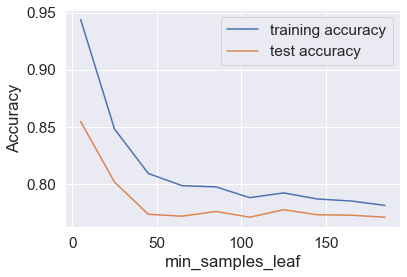

In [131]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



#### The min_samples_leaf seems to be between 5 and 150

In [132]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,
                    cv=n_folds,
                    verbose = 1,
                    n_jobs=-1,
                    scoring="accuracy",
                    return_train_score=True)


tree.fit(X_train_pca,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.9s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [133]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.51,0.38,0.00,0.00,5,{'min_samples_split': 5},0.89,0.88,0.89,0.89,0.88,0.89,0.00,1,1.00,0.99,1.00,0.99,0.99,0.99,0.00
1,3.35,0.35,0.01,0.01,25,{'min_samples_split': 25},0.85,0.85,0.85,0.85,0.84,0.85,0.01,2,0.94,0.94,0.94,0.94,0.94,0.94,0.00
2,3.53,0.28,0.01,0.01,45,{'min_samples_split': 45},0.82,0.82,0.82,0.82,0.81,0.82,0.00,3,0.90,0.90,0.89,0.89,0.91,0.90,0.01
3,3.23,0.39,0.02,0.01,65,{'min_samples_split': 65},0.80,0.80,0.80,0.80,0.81,0.80,0.00,4,0.87,0.87,0.87,0.86,0.89,0.87,0.01
4,3.43,0.45,0.01,0.00,85,{'min_samples_split': 85},0.78,0.79,0.78,0.78,0.80,0.79,0.01,5,0.85,0.85,0.85,0.84,0.86,0.85,0.01


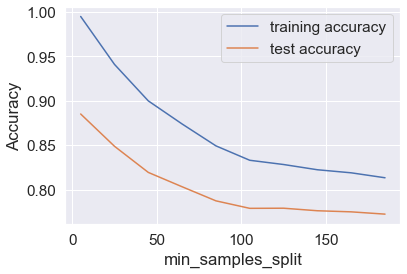

In [134]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#### The min_samples_split seems to be 25

In [135]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                           cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)



Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 10.0min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(5, 200, 20),
                         'min_samples_split': range(5, 200, 20)},
             refit='recall_score', verbose=1)

In [136]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.30,0.25,0.01,0.00,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5}",0.82,0.80,0.81,0.81,0.72,0.79,0.03,17
1,2.64,0.41,0.01,0.00,entropy,5,5,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 25}",0.82,0.80,0.81,0.81,0.72,0.79,0.03,17
2,2.10,0.14,0.00,0.01,entropy,5,5,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 45}",0.82,0.80,0.81,0.81,0.72,0.79,0.03,30
3,2.11,0.28,0.01,0.01,entropy,5,5,65,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 65}",0.82,0.80,0.80,0.81,0.72,0.79,0.03,34
4,2.41,0.24,0.01,0.01,entropy,5,5,85,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 85}",0.82,0.80,0.80,0.81,0.72,0.79,0.03,34


In [137]:
# printing the optimal accuracy score and hyperparameters

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8260662377888968
DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5)


In [138]:
# Instantiate the grid search model

dtree = DecisionTreeClassifier(class_weight='balanced',
                               max_depth=10,
                               min_samples_leaf=5,
                               min_samples_split=5,
                               criterion='gini')

# Fit the grid search to the data
dtree.fit(X_train_pca, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5)

In [139]:
# Making predictions
y_pred_test = dtree.predict(X_test_pca)


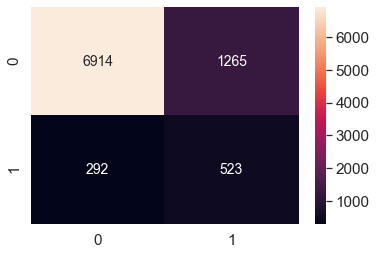

In [140]:
## Lets Derive the confusion matrix 
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_test), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix_df, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()


In [141]:

confusion = confusion_matrix(y_test,y_pred_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [142]:

print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred_test),3)))


Sensitivity:0.642
Specificity:0.845
Accuracy:0.827


In [143]:

pred_probs_test = dtree.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))



AUC:0.72


#### Observation:---
    
   1. After Tuning the Hyper-parameters, We can see that the sensitivity value has significantly.
   2. Sensitivity, Specificity, Accuracy and AUC values are all in good shape for a better model

### Random Forest on PCA dataset:

In [144]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')


In [145]:

# fit the model
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced')

In [146]:
# Making predictions
y_pred_test = rfc.predict(X_test_pca)


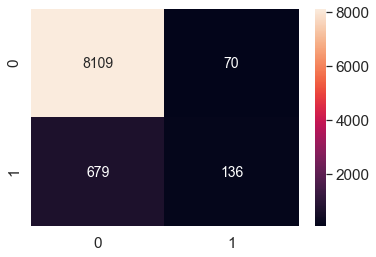

In [147]:
# Lets derive the confusion matrix

confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_test), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix_df, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()


In [148]:

confusion = confusion_matrix(y_test,y_pred_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [149]:

print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred_test),3)))



Sensitivity:0.167
Specificity:0.991
Accuracy:0.917


In [150]:

pred_probs_test = rfc.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))



AUC:0.88


### Observation:-----

 1. Sensitivity:0.15
 2. Specificity:0.993
 3. Accuracy:0.917
 4. We are getting very low value of sensitivity using the default model of random forest. Lets tune the hyper-parameters          for an efficient model


### Hyperparameter Tuning

In [151]:
#Lets do some hyper parameter tuning 
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca,
                           parameters,
                           cv=n_folds,
                           scoring="accuracy",
                           n_jobs=-1,
                           verbose = 1,
                           return_train_score=True
                          )


rf_with_pca.fit(X_train_pca, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   45.2s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [152]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.17,0.43,0.06,0.01,2,{'max_depth': 2},0.82,0.82,0.82,0.83,0.81,0.82,0.01,4,0.83,0.83,0.82,0.83,0.81,0.82,0.01
1,14.57,1.22,0.11,0.05,7,{'max_depth': 7},0.87,0.88,0.89,0.89,0.88,0.88,0.01,3,0.90,0.91,0.90,0.90,0.90,0.90,0.00
2,19.65,0.87,0.15,0.04,12,{'max_depth': 12},0.91,0.91,0.92,0.92,0.91,0.92,0.00,2,0.97,0.97,0.97,0.97,0.97,0.97,0.00
3,20.49,1.40,0.09,0.03,17,{'max_depth': 17},0.92,0.92,0.92,0.92,0.92,0.92,0.00,1,0.99,0.98,0.98,0.98,0.98,0.98,0.00


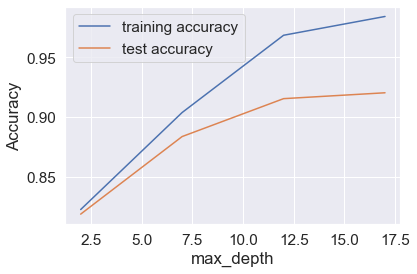

In [153]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



#### The maximum depth seems to be from 10 to 12

In [154]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf,
                  parameters,
                  cv=n_folds,
                  scoring="accuracy",
                  n_jobs=-1,
                  verbose = 1,
                  return_train_score=True
                          )


rf.fit(X_train_pca, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  6.5min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [155]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,19.88,1.76,0.15,0.07,100,{'n_estimators': 100},0.90,0.90,0.91,0.92,0.91,0.91,0.01,4,0.95,0.95,0.95,0.95,0.95,0.95,0.00
1,94.66,7.58,0.75,0.12,500,{'n_estimators': 500},0.90,0.91,0.91,0.91,0.91,0.91,0.00,3,0.95,0.95,0.95,0.95,0.95,0.95,0.00
2,183.96,11.23,1.54,0.38,900,{'n_estimators': 900},0.90,0.91,0.92,0.92,0.91,0.91,0.01,1,0.95,0.95,0.95,0.95,0.95,0.95,0.00
3,198.88,25.00,1.03,0.31,1300,{'n_estimators': 1300},0.90,0.91,0.92,0.91,0.91,0.91,0.01,2,0.95,0.95,0.95,0.95,0.95,0.95,0.00


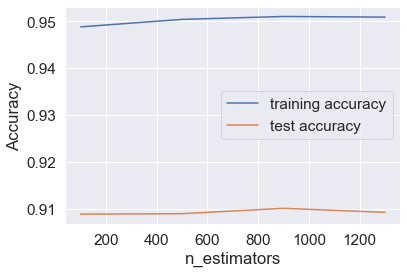

In [156]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_n_estimators"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [157]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf,
                  parameters,
                  cv=n_folds,
                  scoring="accuracy",
                  n_jobs=-1,
                  verbose = 1,
                  return_train_score=True
                          )


rf.fit(X_train_pca, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.8min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [158]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.89,0.21,0.09,0.01,4,{'max_features': 4},0.90,0.91,0.91,0.91,0.91,0.91,0.01,2,0.95,0.95,0.95,0.95,0.95,0.95,0.00
1,17.88,1.19,0.10,0.02,8,{'max_features': 8},0.90,0.91,0.91,0.91,0.91,0.91,0.00,1,0.95,0.95,0.95,0.95,0.95,0.95,0.00
2,32.59,1.65,0.12,0.02,14,{'max_features': 14},0.90,0.90,0.91,0.91,0.91,0.91,0.01,3,0.95,0.95,0.95,0.95,0.95,0.95,0.00
3,43.35,1.38,0.11,0.01,20,{'max_features': 20},0.90,0.90,0.91,0.91,0.91,0.91,0.00,5,0.95,0.95,0.95,0.95,0.95,0.95,0.00
4,44.88,4.81,0.09,0.02,24,{'max_features': 24},0.90,0.90,0.91,0.91,0.91,0.91,0.00,4,0.95,0.95,0.95,0.94,0.95,0.95,0.00


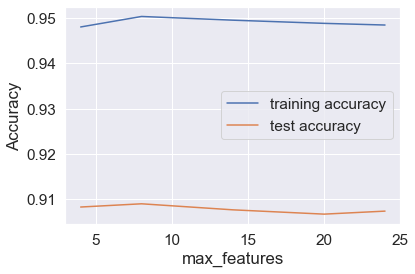

In [159]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_features"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



#### The max_features is between 8 and 10

In [160]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf,
                  parameters,
                  cv=n_folds,
                  scoring="accuracy",
                  n_jobs=-1,
                  verbose = 1,
                  return_train_score=True
                          )


rf.fit(X_train_pca, y_train)



Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   47.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [161]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.24,0.22,0.08,0.01,100,{'min_samples_leaf': 100},0.86,0.86,0.87,0.87,0.86,0.86,0.00,1,0.88,0.88,0.87,0.87,0.88,0.88,0.00
1,11.46,0.26,0.09,0.02,150,{'min_samples_leaf': 150},0.85,0.85,0.86,0.85,0.86,0.85,0.01,2,0.87,0.86,0.86,0.86,0.86,0.86,0.00
2,11.30,0.44,0.10,0.02,200,{'min_samples_leaf': 200},0.85,0.85,0.85,0.86,0.85,0.85,0.00,3,0.86,0.86,0.86,0.86,0.86,0.86,0.00
3,11.32,0.68,0.10,0.02,250,{'min_samples_leaf': 250},0.84,0.84,0.84,0.85,0.85,0.84,0.00,4,0.85,0.85,0.84,0.85,0.85,0.85,0.00
4,11.56,0.97,0.11,0.01,300,{'min_samples_leaf': 300},0.83,0.84,0.84,0.85,0.84,0.84,0.01,5,0.85,0.85,0.84,0.85,0.84,0.85,0.00


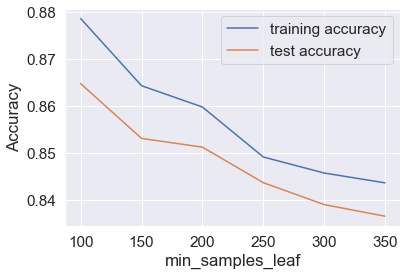

In [162]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



#### The min_samples_leaf is between 100 and 150

In [163]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf,
                  parameters,
                  cv=n_folds,
                  scoring="accuracy",
                  n_jobs=-1,
                  verbose = 1,
                  return_train_score=True
                          )


rf.fit(X_train_pca, y_train)



Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [164]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,21.66,5.21,0.14,0.04,200,{'min_samples_split': 200},0.87,0.88,0.89,0.89,0.89,0.89,0.01,1,0.91,0.91,0.91,0.91,0.91,0.91,0.00
1,17.83,2.65,0.11,0.01,250,{'min_samples_split': 250},0.87,0.87,0.88,0.88,0.88,0.88,0.00,2,0.90,0.90,0.89,0.90,0.89,0.90,0.00
2,21.68,3.30,0.11,0.01,300,{'min_samples_split': 300},0.86,0.87,0.88,0.88,0.88,0.87,0.01,3,0.89,0.89,0.89,0.89,0.89,0.89,0.00
3,18.27,2.95,0.12,0.04,350,{'min_samples_split': 350},0.86,0.87,0.87,0.87,0.87,0.87,0.00,4,0.89,0.88,0.88,0.88,0.89,0.88,0.00
4,16.30,2.13,0.10,0.01,400,{'min_samples_split': 400},0.86,0.86,0.87,0.87,0.87,0.86,0.01,5,0.88,0.88,0.88,0.88,0.88,0.88,0.00


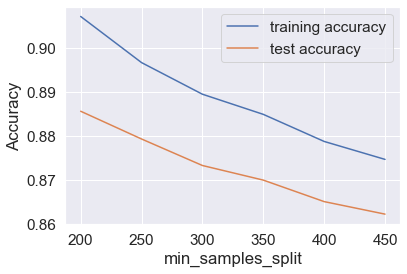

In [165]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



#### The min_samples_split is between 200 and 300

In [166]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           refit='recall_score',
                           cv = 5,
                           n_jobs=-1,
                           verbose = 1
                          )


In [167]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 11.5min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(200, 400, 100)},
             refit='recall_score', verbose=1)

In [168]:
# printing the optimal accuracy score and hyperparameters
print(grid_search.best_score_,)

0.8646175839885633


In [169]:
# printing the best hyperparameters

print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [170]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(
    max_depth=8,
    min_samples_leaf=100,
    min_samples_split=200,
    max_features=8,
    n_estimators=200,
    class_weight='balanced')



In [171]:
# fit the model

rfc.fit(X_train_pca,y_train)


RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=8,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=200)

In [172]:
# Making predictions
y_pred_test = rfc.predict(X_test_pca)
y_pred_test[:5]


array([0, 0, 0, 0, 1])

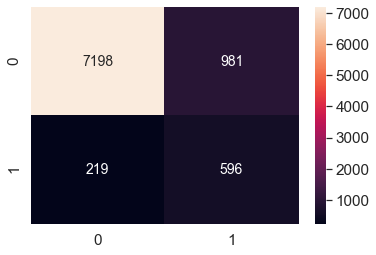

In [173]:
# Lets derive the confusion matrix

confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_test), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix_df, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()



In [174]:

confusion = confusion_matrix(y_test,y_pred_test)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


[[7198  981]
 [ 219  596]]


In [175]:

print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred_test),3)))


Sensitivity:0.731
Specificity:0.88
Accuracy:0.867


In [176]:

pred_probs_test = rfc.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))


AUC:0.89


#### Observation:---

  1. After Tuning the Hyper-parameters, We can see that the sensitivity value has significant value.
  2. Sensitivity, Specificity, Accuracy and AUC values are all in good shape for a better model.



## XGBoost Algorithm :-------

In [177]:
## Lets apply XGBoost algorithm  
## Importing all the necessary libraries related to XGBoost

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance


In [178]:
## Lets divide the data into train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X_scale_final, Y, train_size=0.7, test_size=0.3, random_state=100)
print("X_scale_final shape:",X_scale_final.shape)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_scale_final shape: (29979, 161)
X_train shape: (20985, 161)
y_train shape: (20985,)
X_test shape: (8994, 161)
y_test shape: (8994,)


In [180]:
# fit model on training data with default hyperparameters
model = XGBClassifier(random_state=100)
model.fit(X_train, y_train)

XGBClassifier(random_state=100)

In [181]:
# making predictions
y_pred_test = model.predict(X_test)
y_pred_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

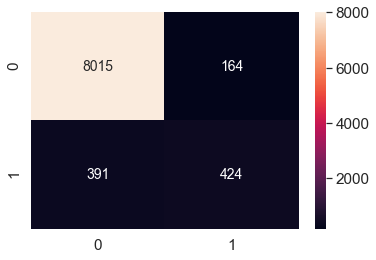

In [182]:
# Lets derive the confusion matrix
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_test), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix_df, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()

In [183]:
confusion = confusion_matrix(y_test,y_pred_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [184]:

print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred_test),3)))


Sensitivity:0.52
Specificity:0.98
Accuracy:0.938


In [185]:
# hyperparameter tuning with XGBoost
from sklearn.model_selection import GridSearchCV
# creating 5 Fold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'accuracy',
                        cv = folds,
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True
                       )



In [186]:
# fit the model
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished


GridSearchCV(cv=5, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [187]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,18.56,0.27,0.07,0.02,0.20,0.30,"{'learning_rate': 0.2, 'subsample': 0.3}",0.93,0.94,0.94,0.94,0.94,0.94,0.00,3,0.95,0.95,0.95,0.95,0.95,0.95,0.00
1,24.79,0.88,0.06,0.01,0.20,0.60,"{'learning_rate': 0.2, 'subsample': 0.6}",0.93,0.94,0.94,0.94,0.94,0.94,0.00,2,0.95,0.95,0.95,0.95,0.95,0.95,0.00
2,26.56,0.23,0.07,0.01,0.20,0.90,"{'learning_rate': 0.2, 'subsample': 0.9}",0.94,0.94,0.94,0.95,0.94,0.94,0.00,1,0.95,0.95,0.95,0.95,0.95,0.95,0.00
3,19.91,0.52,0.07,0.01,0.60,0.30,"{'learning_rate': 0.6, 'subsample': 0.3}",0.92,0.92,0.93,0.93,0.93,0.93,0.01,6,0.95,0.95,0.95,0.95,0.95,0.95,0.00
4,25.39,1.32,0.06,0.01,0.60,0.60,"{'learning_rate': 0.6, 'subsample': 0.6}",0.93,0.93,0.94,0.94,0.94,0.93,0.00,5,0.97,0.97,0.97,0.97,0.97,0.97,0.00
5,21.40,2.10,0.04,0.01,0.60,0.90,"{'learning_rate': 0.6, 'subsample': 0.9}",0.93,0.93,0.94,0.94,0.94,0.94,0.00,4,0.97,0.97,0.97,0.97,0.97,0.97,0.00


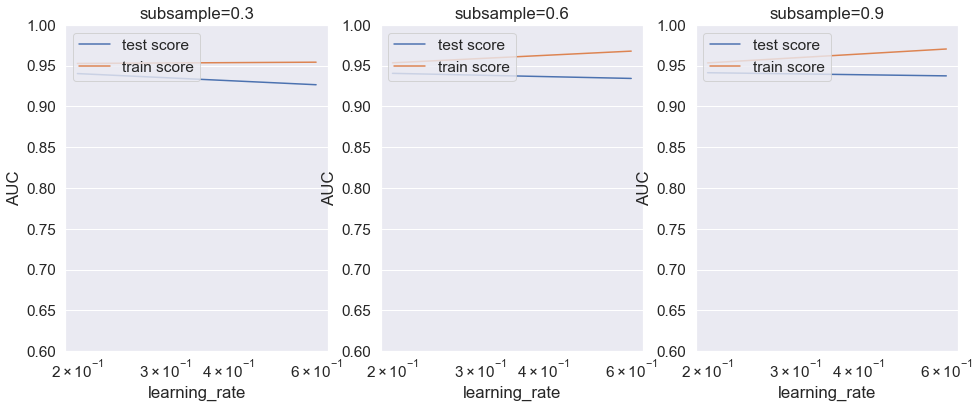

In [188]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
              'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    plt.subplot(1,len(param_grid['subsample']), n+1)
    plot_df = cv_results[cv_results['param_subsample']==subsample]
    
    plt.plot(plot_df["param_learning_rate"], plot_df["mean_test_score"])
    plt.plot(plot_df["param_learning_rate"], plot_df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')
    

In [189]:
# chosen hyperparameters
# from the above graph it is evident that learning_rate =0.2 and subsample=0.9 produces a model with higher AUC with overfitting.
#so using those parameters for the final model.
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)


In [190]:
## Lets fit the model
model.fit(X_train, y_train)


XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

In [191]:
# predict
#y_pred is for probabilistic predictions used for AUC.

y_pred_test = model.predict_proba(X_test)


In [192]:
print("y_pred_test :-----")

y_pred_test[:10]


y_pred_test :-----


array([[0.99374413, 0.00625588],
       [0.9917267 , 0.0082733 ],
       [0.99362135, 0.00637862],
       [0.99016064, 0.00983938],
       [0.7898134 , 0.2101866 ],
       [0.83196044, 0.16803953],
       [0.98120004, 0.01879994],
       [0.8481617 , 0.1518383 ],
       [0.9905337 , 0.0094663 ],
       [0.9765249 , 0.02347508]], dtype=float32)

In [193]:
# roc_auc
import sklearn
auc = sklearn.metrics.roc_auc_score(y_test, y_pred_test[:, 1])
auc

0.9329236853021017

In [194]:
#y_pred_actual was for the predictions interms of churns

y_pred_actual_test = model.predict(X_test)
y_pred_actual_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

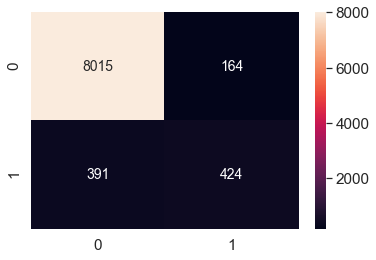

In [195]:
# Lets derive the confusion matrix

confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_actual_test), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix_df, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()

In [196]:

confusion = confusion_matrix(y_test,y_pred_actual_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [197]:

print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred_actual_test),3)))



Sensitivity:0.52
Specificity:0.98
Accuracy:0.938


#### Observation:-----
  
      Sensitivity:0.519
      Specificity:0.981
      Accuracy:0.939       
  
  We are getting very low value of sensitivity using the tunes model also.
  
  

### Inference from Churn Prediction :

   1. We performed PCA for dimensionality reduction on the dataset and then used different models on the reduced dataset 
      to predict whether a high value customer will churn or not.
   2. The appropriate metric to identify all the churners correctly will be recall or sensitivity.
   3. We did hypertunning to the different models to achieve optimal performance. 
   4. We used balanced class weight parameter to handle the class imbalance.
   5. By comparing the various model performance and considering the metrics Sensitivity/Recall to be important in this case,         we can conclude that the best performing model is Logistic Regression. XGBoost is also good but as good as Logistic             regression
   6. With that model we were able to achieve the lowest false negatives for our prediction and also highest AUC score.
   

  Below is a comparison of the metrics obtained from different classification models on test data:


  Logistic Regression  
  Accuracy    ---	0.89  
  Sensitivity ---   0.822	
  Specificity ---   0.817	
  AUC Score   ---   0.89  

  Decision Tree	  
  Accuracy    ---	0.781	
  Sensitivity ---   0.76	
  Specificity ---   0.783	
  AUC Score   ---   0.84  


  Random Forest	  
  Accuracy    ---   0.843	
  Sensitivity ---   0.757	
  Specificity ---   0.852	
  AUC Score   ---   0.88
  
  
  XGBoost
  Accuracy    ---    0.939     
  Sensitivity ---    0.519     
  Specificity ---    0.981     
  AUC Score   ---    0.92
  
  

## Model 2 :-- Identifying Important Predictors :

In [245]:
## lets build another model to identify the important feature variables that are responsible for churn. 
## We will re-utilise the X_train and X_test dataset we had earlier created. But here we will not add PCA to it. 

In [246]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
26370,-1.67,0.22,1.24,-0.71,-0.58,-0.51,-0.97,2.09,4.59,-0.29,-0.26,-0.26,-0.31,-0.28,-0.28,-0.54,-0.30,-0.29,-0.82,-0.76,-0.61,-0.43,-0.43,-0.42,-0.34,0.82,-0.28,-0.84,-0.69,-0.57,-0.51,-0.48,-0.42,-0.54,2.89,5.21,-0.25,-0.24,-0.24,-0.70,1.56,3.55,-0.16,-0.17,-0.15,-0.46,-0.11,-0.01,-0.39,0.00,0.00,-1.11,1.08,2.84,-0.64,-0.62,-0.51,-0.84,-0.69,-0.52,-0.45,-0.18,-0.08,-0.88,-0.74,-0.57,-0.40,-0.35,-0.38,-0.48,-0.22,-0.04,-0.28,-0.28,-0.28,-0.52,-0.33,-0.22,-0.95,-0.77,-0.59,-0.44,-0.20,-0.26,-0.26,-0.27,-0.25,-0.26,-0.26,-0.26,-1.27,2.18,1.48,-1.69,0.24,1.32,-1.12,-0.40,-0.21,-0.92,-0.81,0.35,-0.51,-0.51,-0.53,-0.58,-0.59,-0.57,-0.41,-0.43,-0.44,-0.38,-0.37,-0.36,-0.55,-0.55,-0.54,-0.34,-0.33,-0.32,-0.38,-0.39,-0.38,-0.36,-0.37,-0.36,-0.39,-0.39,-0.37,0.78,0.79,0.80,-0.34,-0.34,-0.32,-0.34,-0.35,-0.37,-0.33,-0.33,-0.32,-0.23,-0.23,-0.22,0.74,0.75,0.74,-0.19,-0.38,-0.37,-0.36
10382,-0.70,-0.19,-0.98,-0.59,-0.61,-0.60,-0.75,-0.74,-0.67,-0.29,-0.26,-0.26,-0.31,-0.28,-0.28,-0.34,-0.32,-0.44,-0.40,-0.40,-0.35,-0.10,-0.06,-0.25,-0.34,-0.34,-0.33,-0.45,-0.45,-0.46,-0.47,-0.51,-0.46,-0.54,-0.54,-0.50,-0.25,-0.24,-0.24,-0.67,-0.70,-0.62,-0.16,-0.17,-0.15,-0.46,-0.50,-0.49,-0.39,0.00,0.00,-0.88,-0.90,-0.81,-0.44,-0.48,-0.59,-0.46,-0.62,-0.50,0.02,-0.00,-0.42,-0.50,-0.62,-0.62,-0.20,-0.37,-0.23,-0.45,-0.48,-0.46,-0.28,-0.28,-0.28,-0.43,-0.51,-0.44,-0.60,-0.72,-0.69,-0.44,-0.20,-0.26,-0.26,-0.23,-0.25,-0.26,-0.26,-0.26,-0.35,0.14,-0.35,-0.71,-0.27,-0.87,0.55,0.51,-0.76,-0.85,-0.69,-0.38,0.07,0.52,0.02,2.09,2.04,1.07,-0.41,0.21,0.20,1.02,0.87,-0.36,1.05,1.86,0.42,0.54,0.05,-0.28,-0.32,3.32,0.33,1.18,1.36,-0.05,1.38,1.33,-0.37,-1.30,-1.27,-1.26,-0.34,2.30,2.55,-0.34,-0.35,-0.37,1.66,1.59,-0.32,-0.23,-0.23,-0.22,-1.03,-0.99,-0.89,-0.27,0.05,5.38,-0.24
5067,0.95,-0.24,-0.02,-0.50,-0.64,-0.61,0.10,0.14,-0.36,-0.29,

In [247]:
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
22880,0.94,0.65,1.33,2.19,2.35,1.78,0.79,0.89,1.12,-0.29,-0.26,-0.26,-0.31,-0.28,-0.28,6.19,6.18,6.15,2.45,2.74,3.00,-0.43,-0.43,-0.04,-0.34,-0.34,-0.33,4.71,4.65,4.64,-0.51,-0.52,-0.47,-0.42,-0.42,-0.41,-0.25,-0.24,0.35,-0.62,-0.62,-0.56,-0.16,-0.17,-0.15,-0.39,0.16,-0.20,1.15,0.00,0.00,2.05,2.22,1.92,5.76,3.26,5.91,0.83,2.14,1.64,-0.37,-0.03,1.51,2.76,2.61,3.40,-0.40,-0.40,-0.38,0.36,0.37,0.39,-0.28,-0.28,-0.28,0.04,0.04,0.06,2.30,2.14,2.82,-0.44,-0.20,-0.26,-0.26,-0.27,-0.25,-0.26,-0.26,-0.26,0.12,-0.31,0.10,0.87,0.55,1.56,-0.39,-0.40,-0.21,0.09,0.07,0.35,-0.51,-0.51,-0.53,-0.58,-0.59,-0.57,-0.41,-0.43,-0.44,-0.38,-0.37,-0.36,-0.55,-0.55,-0.54,-0.34,-0.33,-0.32,-0.38,-0.39,-0.38,-0.36,-0.37,-0.36,-0.39,-0.39,-0.37,0.78,0.79,0.80,-0.34,-0.34,-0.32,-0.34,-0.35,-0.37,-0.33,-0.33,-0.32,-0.23,-0.23,-0.22,0.74,0.75,0.74,-0.72,-0.38,-0.37,-0.36
21814,-0.06,-0.20,0.06,-0.23,-0.37,-0.27,-0.16,0.12,0.53,0.60,-0.26,-0.26,0.27,-0.28,-0.28,0.52,0.33,0.50,0.64,1.32,2.01,-0.10,0.03,-0.21,-0.34,-0.34,-0.33,0.65,1.01,1.53,-0.51,-0.52,-0.47,-0.54,-0.53,-0.50,-0.25,-0.24,-0.24,-0.70,-0.69,-0.63,-0.16,-0.11,-0.15,-0.46,-0.42,-0.42,-0.39,0.00,0.00,-0.31,-0.15,0.20,0.81,0.58,0.78,0.59,0.72,0.73,-0.28,0.04,0.76,0.65,0.67,0.83,-0.35,-0.40,-0.38,-0.45,-0.40,-0.38,-0.28,-0.28,-0.28,-0.48,-0.46,-0.44,0.36,0.37,0.53,-0.44,-0.20,-0.26,-0.26,-0.27,-0.25,-0.08,-0.26,-0.13,-0.46,-0.31,-0.35,-0.13,0.06,0.06,-0.27,-0.27,-0.11,0.25,0.25,0.47,-0.51,-0.51,-0.53,-0.58,-0.59,-0.57,-0.41,-0.43,-0.44,-0.38,-0.37,-0.36,-0.55,-0.55,-0.54,-0.34,-0.33,-0.32,-0.38,-0.39,-0.38,-0.36,-0.37,-0.36,-0.39,-0.39,-0.37,0.78,0.79,0.80,-0.34,-0.34,-0.32,-0.34,-0.35,-0.37,-0.33,-0.33,-0.32,-0.23,-0.23,-0.22,0.74,0.75,0.74,-0.91,-0.38,-0.37,-0.36
25755,-0.80,-0.69,-0.97,-0.63,-0.53,-0.54,-0.36,-0.51,-0.67,-0.29,-0.26,-0.26,-0.31,-0.28,-0.28,-0.35,-0.10

In [248]:

print(X_train.shape)
print(X_test.shape)

(20985, 151)
(8994, 151)


In [249]:

# Lets create a Tree Based model i.e. RandomForestClassifier Model to identify the important predictor variables.
# The reason for opting randomForest is that we dont have look out for multi-collinearity between the feature variables.
# It will be automatically taken care.

In [250]:

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')


In [251]:

# fit the model
rfc.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [252]:

# Making predictions
y_pred_test = rfc.predict(X_test)


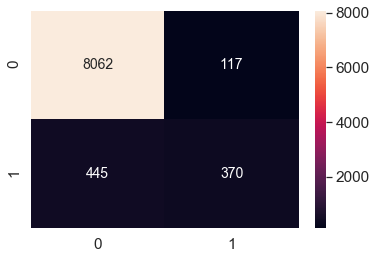

In [253]:
# Lets derive the Confusion Matrix

confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_test), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix_df, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()

In [254]:

confusion = confusion_matrix(y_test,y_pred_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [255]:

print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred_test),3)))



Sensitivity:0.454
Specificity:0.986
Accuracy:0.938


In [256]:

# Lets check the AUC value
pred_probs_test = rfc.predict_proba(X_test)[:,1]
print("AUC:{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))


AUC:0.92



#### Observation :---

  1. The Accuracy, Specificity and AUC is good for the default model but the sensitivity is poor
  2. Tuning the hyper-parameters may improve the model performance. Lets check it out


### Hyperparameter Tuning:----

In [257]:

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [100,200,300,500],
    'max_features': [5,10]
}

# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                           cv = 3, n_jobs = -1,verbose = 1,scoring='recall')


In [258]:
# Fit the grid search to the data

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 14.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [259]:
## Lets display the best parameters

grid_search.best_params_


{'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 200,
 'min_samples_split': 300,
 'n_estimators': 300}

In [260]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10,
                             min_samples_leaf=200,
                             min_samples_split=300,
                             max_features=10,
                             n_estimators=300,
                             class_weight='balanced')


In [261]:
# fit the model with tuned parameters
rfc.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=200, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [262]:
# Making predictions
y_pred_test = rfc.predict(X_test)
y_pred_test[:5]


array([0, 0, 0, 0, 1])

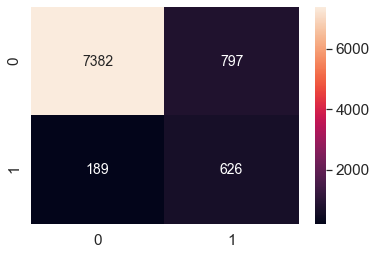

In [263]:
# Lets derive the confusion matrix

confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_test), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix_df, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()


In [264]:
## Confusion Matrix details
confusion = confusion_matrix(y_test,y_pred_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives



In [265]:
## Sensitivity, Specificity and Accuracy details

print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred_test),3)))


Sensitivity:0.768
Specificity:0.903
Accuracy:0.89


In [266]:
## lets get the AUC value for the tuned model

pred_probs_test = rfc.predict_proba(X_test)[:,1]
print("AUC:{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))


AUC:0.92


#### Observation :----

   1. The model metrics looks good now. 
   2. The next step is to identify the important predictor variables.


In [267]:
# Print the name and gini importance of each feature
feature_labels = X_train.columns
for feature in zip(feature_labels, rfc.feature_importances_):
    print(feature)


('arpu_6', 0.0013070213271025209)
('arpu_7', 0.002056508092337266)
('arpu_8', 0.04110666613627382)
('onnet_mou_6', 0.0011265118266562421)
('onnet_mou_7', 0.0012936078000329873)
('onnet_mou_8', 0.011794274704947271)
('offnet_mou_6', 0.0011184598440892066)
('offnet_mou_7', 0.0014512298096654747)
('offnet_mou_8', 0.02256212924053324)
('roam_ic_mou_6', 0.0004941137211222084)
('roam_ic_mou_7', 0.0011818889009417599)
('roam_ic_mou_8', 0.02944302923804277)
('roam_og_mou_6', 0.0003163025182623624)
('roam_og_mou_7', 0.0027794430893121713)
('roam_og_mou_8', 0.03866209065935325)
('loc_og_t2t_mou_6', 0.001464390952578682)
('loc_og_t2t_mou_7', 0.0013561052545386283)
('loc_og_t2t_mou_8', 0.04885801422074838)
('loc_og_t2m_mou_6', 0.0015063371240545628)
('loc_og_t2m_mou_7', 0.0032512685119099266)
('loc_og_t2m_mou_8', 0.04803481862263392)
('loc_og_t2f_mou_6', 0.0015941889761897493)
('loc_og_t2f_mou_7', 0.001360145024345649)
('loc_og_t2f_mou_8', 0.010927095154448108)
('loc_og_t2c_mou_6', 4.5122446893451

In [268]:
feature_df = pd.concat([pd.Series(feature_labels),pd.Series(rfc.feature_importances_)],
                       axis=1).rename(columns={0:'Features',1:'Weight'})
feature_df.head(10)


,Features,Weight
0,arpu_6,0.00
1,arpu_7,0.00
2,arpu_8,0.04
3,onnet_mou_6,0.00
4,onnet_mou_7,0.00
5,onnet_mou_8,0.01
6,offnet_mou_6,0.00
7,offnet_mou_7,0.00
8,offnet_mou_8,0.02
9,roam_ic_mou_6,0.00


In [269]:
# Lets display the top 10 features
top_10 = feature_df.sort_values('Weight',ascending=False).head(10)
top_10


,Features,Weight
80,total_ic_mou_8,0.08
29,loc_og_mou_8,0.07
59,loc_ic_t2m_mou_8,0.07
56,loc_ic_t2t_mou_8,0.06
53,total_og_mou_8,0.05
65,loc_ic_mou_8,0.05
95,total_rech_amt_8,0.05
17,loc_og_t2t_mou_8,0.05
20,loc_og_t2m_mou_8,0.05
101,last_day_rch_amt_8,0.04


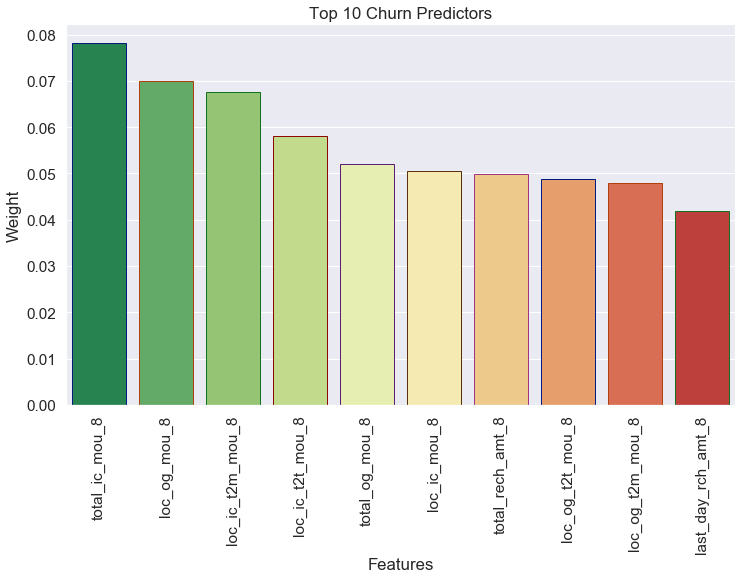

In [270]:
## lets plot barchart to understand the behavior of the top 10 churn predictors

plt.figure(figsize=(12,7))
ax = sns.barplot(data = top_10, x='Features', y='Weight',palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
ax.set_title("Top 10 Churn Predictors")
plt.xticks(rotation=90)
plt.show()


#### Observation :----

 1. From the bar chart, it is clearly evident that the most important predictor variables are 

  1.  loc_ic_mou_8
  2.  loc_ic_t2t_mou_8
  3.  total_ic_mou_8
  4.  loc_ic_t2m_mou_8
  5.  loc_og_mou_8
  6.  loc_og_t2m_mou_8
  7.  total_rech_amt_8
  8.  total_og_mou_8
  9.  loc_og_t2t_mou_8
  10. last_day_rch_amt_8  
  
  
 2. All the above features indicate that the action phase is important in determing the churing of the customers.
 3. The amount of calls made by the customer in the action phase i.e. in the 8th month indicates the behavior of the customer.       He/She will start making more outgoing calls just to finish the amount he has recharged in the past
 4. ARPU also plays an important role as it indicates that the average revenue generated by the user in the 8th month is not         good as compared to the previous months 
 
 

### Recommendation to Reduce the Churing Rate :---

  1. Provide Good offers for the customers
  2. Identify the high valuable customers and take their feedbacks on regular intervals 
  3. Connect with the customers to see if they are having any concerns and provide better customer service
  4. Analyze the outgoing and incoming calls to understand the customer's callusage. If it is less as compared to the previous        months, connct with them